# **Dataset Description**
In this research, the dataset was regarding to the traffic management system that contains the well-defined categories of Efficiency related NFRs such as time behavior, efficiency compliance and resource utilization. It has six columns: requirement ID, requirement sentences, time behavior, resource utilization and efficiency compliance and other. These labeled categories of dataset are necessary for supervised machine learning model because the model will learn the patterns based on labeled data.

In [ ]:
from google.colab import drive
# Use drive.mount instead of drive._mount
drive.mount('/content/drive', force_remount=True)

In [1]:
from google.colab import files
import pandas as pd #import necessary libraries

uploaded = files.upload() # Upload the file
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

dataset_path = '/content/Traffic_Management_NFR_Dataset.csv'
try:
    df = pd.read_csv(dataset_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If ISO-8859-1 doesn't work, you can try 'latin1' or 'utf-16'
    df = pd.read_csv(dataset_path, encoding='latin1')

# Display a success message and preview the dataset
print("Dataset Loaded Successfully")
print(df.head())
print("\nDataset Information:")
df.info()

Saving Traffic_Management_NFR_Dataset.csv to Traffic_Management_NFR_Dataset.csv
User uploaded file "Traffic_Management_NFR_Dataset.csv" with length 230009 bytes
Dataset Loaded Successfully
  requirement_id                                           sentence  \
0         RQ0001  The system must update traffic signal statuses...   
1         RQ0002  The system should not exceed 75% CPU utilizati...   
2         RQ0003  Traffic data processing must be completed with...   
3         RQ0004  The system should consume no more than 15% of ...   
4         RQ0005  The traffic control system must comply with IS...   

   time_behavior  resource_utilization  efficiency_compliance  others  
0              1                     0                    0.0     0.0  
1              0                     1                    0.0     0.0  
2              1                     0                    0.0     0.0  
3              0                     1                    0.0     0.0  
4              0        

In this dataset, the requirement sentences has written in English Language and it can be used for NLP tasks such as ambiguity detection, identification and requirements categorization. The textual data from the requirement sentences will be transformed into numerical vectors that model can understand. We do not have number of documents in dataset, we just have requirement sentences that are labeled already in the dataset so we do not need to identify the manually.

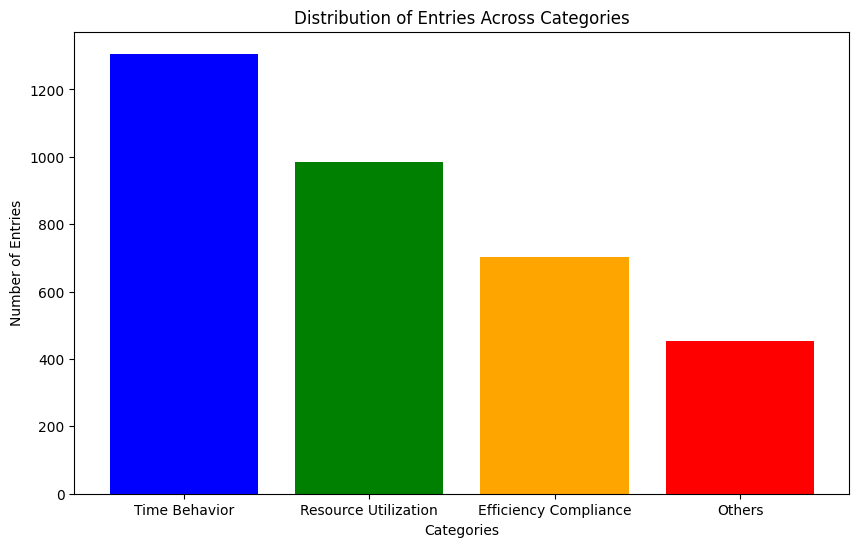

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded in a DataFrame called 'df'
# Columns: 'requirement_id', 'requirement_sentences', 'time_behavior', 'resource_utilization', 'efficiency_compliance', 'others'

# Count the number of entries for each category, ensuring integer type
time_behavior_count = int(df['time_behavior'].sum()) # Convert to int
resource_utilization_count = int(df['resource_utilization'].sum()) # Convert to int
efficiency_compliance_count = int(df['efficiency_compliance'].sum()) # Convert to int
others_count = int(df['others'].sum()) # Convert to int


# Combine counts into a dictionary for visualization
category_counts = {
    "Time Behavior": time_behavior_count,
    "Resource Utilization": resource_utilization_count,
    "Efficiency Compliance": efficiency_compliance_count,
    "Others": others_count
}

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(category_counts.keys()), list(category_counts.values()), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Categories")
plt.ylabel("Number of Entries")
plt.title("Distribution of Entries Across Categories")
plt.show()

As given in dataset, if any requirement sentence lies in any attribute category either in time behavior, resource utilization or efficiency compliance then regarding attribute will get the score 1 and rests will be 0. If any requirement sentence does not lies in any category then other column will get the score 1 and rest will be 0.

In [3]:
print("Directory removed")
!rm -rf ~/nltk_data

Directory removed


# **Dataset Augmentation**
**Dataset augmentation** is a process used to artificially increase the size and diversity of a dataset by generating new, synthetic data samples from the existing ones. It is commonly employed to improve the robustness and generalizability of machine learning models, particularly when dealing with small or imbalanced datasets. In computer vision, techniques like rotation, flipping, scaling, adding noise, and color adjustments are popular, while in natural language processing, methods such as synonym replacement, back translation, word insertion, and deletion are widely used.

For **audio data**, techniques include time stretching, pitch shifting, and noise injection, while in structured datasets, methods like SMOTE (Synthetic Minority Oversampling Technique) and feature combination are applied. Augmentation helps prevent overfitting, addresses class imbalance, and reduces the need for collecting additional real-world data, making it a cost-effective approach to enhance model performance across various domains, including healthcare, finance, and autonomous systems.

In [4]:
!pip install nlpaug # Install nlpaug library
import nltk # import nltk library
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 11.4 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

**nlpaug stands for Natural Language Processing Augmentation** is a Python library used for data augmentation in Natural Language Processing (NLP) tasks. It helps enhance datasets by generating new examples or modifying existing ones to increase robustness and reduce overfitting in machine learning models. It Used in tasks like sentiment analysis, text classification, or NER (Named Entity Recognition) where data diversity is essential. nlpaug perform text augmentation, character-level-augmentation by adding noise to characters, word level augmentation by replacing words with synonyms and sentence level augmentation by reordering, rephrasing or changing the sentences

In [6]:
# prompt: I want to perform the augmentation to increase the length of dataset and to balance the entries of dataset

!pip install nlpaug # Install nlpaug library
import nltk # import nltk library
nltk.download('wordnet') # Download WordNet
nltk.download('omw-1.4') # Download Open Multilingual Wordnet
nltk.download('averaged_perceptron_tagger') # Download the resource for POS tagging

import nlpaug.augmenter.word as naw

# Create an augmenter for synonym replacement
aug = naw.SynonymAug(aug_src='wordnet')

# Function to augment a single sentence
def augment_sentence(sentence):
    # Check if the sentence is valid (not NaN and is a string)
    if isinstance(sentence, str) and not pd.isna(sentence):
        augmented_sentences = aug.augment(sentence, n=2)  # Generate 2 augmented sentences
        return augmented_sentences
    else:
        return []  # Return an empty list if sentence is invalid

# Apply augmentation to each sentence in the dataset
augmented_data = []

for index, row in df.iterrows():
  original_sentence = row['sentence']
  augmented_sentences = augment_sentence(original_sentence)
  for sentence in augmented_sentences:
      new_row = row.copy()
      new_row['sentence'] = sentence
      augmented_data.append(new_row)

augmented_df = pd.DataFrame(augmented_data)
df = pd.concat([df, augmented_df], ignore_index=True)

# Now 'df' contains the original data and the augmented data
# --- Balancing the Dataset ---
# Find the maximum count of any category
max_count = max(category_counts.values())

# Upsample minority categories
upsampled_data = []

for category in category_counts:
    category_column = category.lower().replace(" ", "_")  # e.g., "Time Behavior" -> "time_behavior"
    category_df = df[df[category_column] == 1]
    current_count = len(category_df)

    if current_count < max_count:
        # Upsample until the count reaches max_count
        samples_to_add = max_count - current_count
        # Randomly sample with replacement from existing entries.
        upsampled_category_df = category_df.sample(n=samples_to_add, replace=True, random_state=42)
        upsampled_data.append(upsampled_category_df)

# Concatenate the upsampled data
if upsampled_data:
  upsampled_df = pd.concat(upsampled_data, ignore_index=True)
  df = pd.concat([df, upsampled_df], ignore_index=True)

# Display updated dataset info
print("\nUpdated Dataset Information:")
df.info()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30427 entries, 0 to 30426
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   requirement_id         30427 non-null  object 
 1   sentence               30012 non-null  object 
 2   time_behavior          30427 non-null  int64  
 3   resource_utilization   30427 non-null  int64  
 4   efficiency_compliance  30418 non-null  float64
 5   others                 30400 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.4+ MB


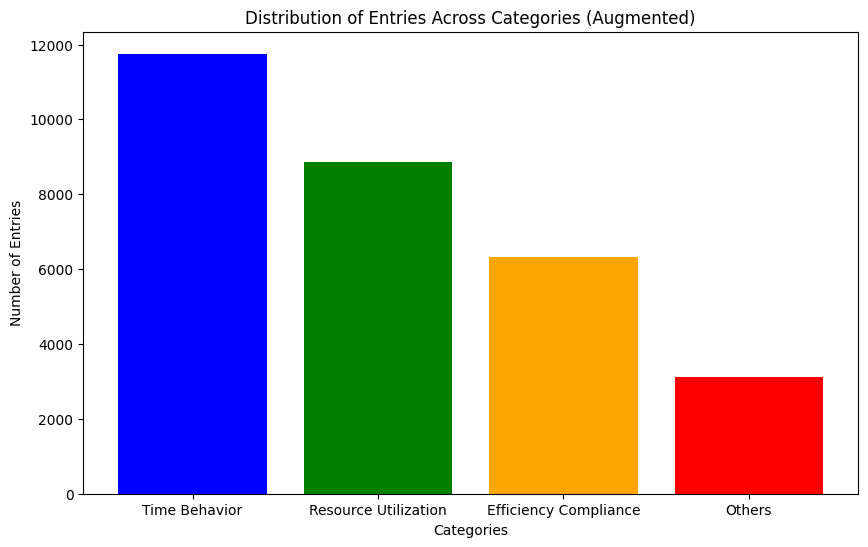

In [7]:
# prompt: Now display the distribution of entries after the augmentation

# Count the number of entries for each category after augmentation
time_behavior_count_augmented = int(df['time_behavior'].sum())
resource_utilization_count_augmented = int(df['resource_utilization'].sum())
efficiency_compliance_count_augmented = int(df['efficiency_compliance'].sum())
others_count_augmented = int(df['others'].sum())

# Combine counts into a dictionary for visualization
category_counts_augmented = {
    "Time Behavior": time_behavior_count_augmented,
    "Resource Utilization": resource_utilization_count_augmented,
    "Efficiency Compliance": efficiency_compliance_count_augmented,
    "Others": others_count_augmented
}

# Create the bar chart for the augmented dataset
plt.figure(figsize=(10, 6))
plt.bar(list(category_counts_augmented.keys()), list(category_counts_augmented.values()), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Categories")
plt.ylabel("Number of Entries")
plt.title("Distribution of Entries Across Categories (Augmented)")
plt.show()

In [8]:
# prompt: now i want to download the dataset file after the augmentation

# Download the augmented dataset as a CSV file
print("Downloading augmented dataset...")
df.to_csv('augmented_dataset.csv', index=False)
files.download('augmented_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Dataset Balancing**
**Dataset Balancing** is the technique process of adjusting the distribution of
data samples in the data to ensure that each category is equally presented. It
is very crucial step in machine learning for handling the imbalanced dataset
to improve the generalization and enhance the evaluation matrices.

The **Random Oversampling technique** is used for balancing method which
involves the duplicating from minority categories to ensure that all categories
have an equal number of samples. Data Balancing helps to prevent biasness in the machine learning models by ensuring that they perform well across
all classes rather than favouring the majority class.


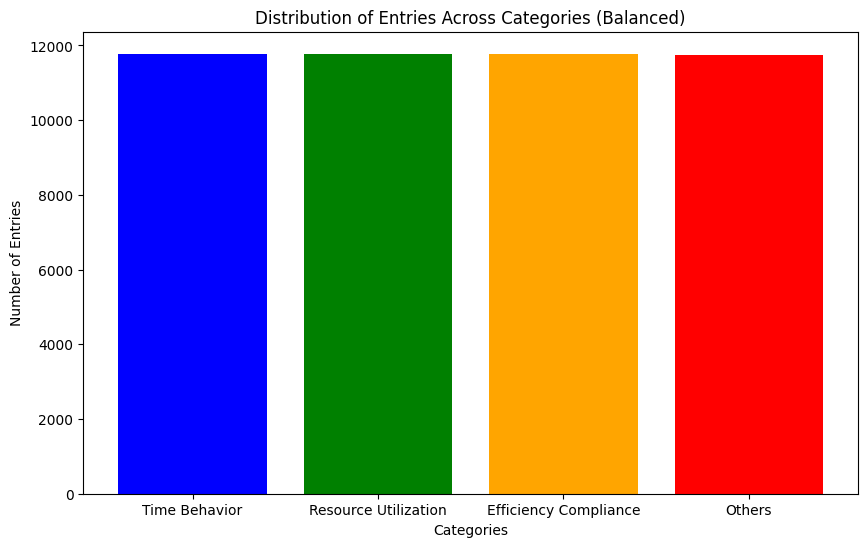

In [9]:
# prompt: now balance the entries of the augmented dataset and display the bar chart

# --- Balancing the Dataset ---
# Find the maximum count of any category
max_count = max(category_counts_augmented.values())

# Upsample minority categories
upsampled_data = []

for category in category_counts_augmented:
    category_column = category.lower().replace(" ", "_")  # e.g., "Time Behavior" -> "time_behavior"
    category_df = df[df[category_column] == 1]
    current_count = len(category_df)

    if current_count < max_count:
        # Upsample until the count reaches max_count
        samples_to_add = max_count - current_count
        # Randomly sample with replacement from existing entries.
        upsampled_category_df = category_df.sample(n=samples_to_add, replace=True, random_state=42)
        upsampled_data.append(upsampled_category_df)

# Concatenate the upsampled data
if upsampled_data:
  upsampled_df = pd.concat(upsampled_data, ignore_index=True)
  df = pd.concat([df, upsampled_df], ignore_index=True)


# Recalculate counts after balancing
time_behavior_count_balanced = int(df['time_behavior'].sum())
resource_utilization_count_balanced = int(df['resource_utilization'].sum())
efficiency_compliance_count_balanced = int(df['efficiency_compliance'].sum())
others_count_balanced = int(df['others'].sum())

# Combine counts into a dictionary for visualization
category_counts_balanced = {
    "Time Behavior": time_behavior_count_balanced,
    "Resource Utilization": resource_utilization_count_balanced,
    "Efficiency Compliance": efficiency_compliance_count_balanced,
    "Others": others_count_balanced
}

# Create the bar chart for the balanced dataset
plt.figure(figsize=(10, 6))
plt.bar(list(category_counts_balanced.keys()), list(category_counts_balanced.values()), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Categories")
plt.ylabel("Number of Entries")
plt.title("Distribution of Entries Across Categories (Balanced)")
plt.show()

In [10]:
# prompt: download the dataset file for the balanced data

# Download the balanced dataset
print("Downloading balanced dataset...")
df.to_csv('balanced_dataset.csv', index=False)
files.download('balanced_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Data Preprocessing**
Cleaning, organizing, and converting raw data into a structured format that is better suited for analysis is known as **data preprocessing**. It is usually carried out prior to entering data into a machine learning model and is an essential phase in the data mining process. In essence, criteria are based on words, sentences, punctuation, special characters, numbers, and so on. To make processing and feature extraction easier, this document has to be divided into smaller pieces. Additionally, several of the sentences in these requirements should be removed because they are not relevant to the requirements.

For the implementation, we utilized the sentence tokenization function from the **NLTK library in Python** which is designed to extract English sentences from a document. For that purpose, download the necessary dependencies that given below.

In [11]:
import pandas as pd
import nltk
import re

# Download necessary resources for nltk (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |  

True

We performed this task in three steps: tokenization, data cleaning, and normalization that will be discussed below:

In [13]:
import nltk

# Check if punkt is available, otherwise download it
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is already installed.")
except LookupError:
    print("Downloading punkt tokenizer...")
    nltk.download('punkt')

# Verify its location
print("Here is the path for desired library:")
print(nltk.data.find('tokenizers/punkt'))

Punkt tokenizer is already installed.
Here is the path for desired library:
/root/nltk_data/tokenizers/punkt


**Tokenization** is the process in which the requirements sentences are divided into smaller segments.  The sentences is first broken down into words. A specific set of criteria was used to identify sentence boundaries, including a capital letter at the beginning and punctuation marks such as a full stop, question mark, or exclamation mark at the end.

In [14]:
# prompt: After performing the augmentation on the dataset that increase the length of the dataset. Now I want to perform the tokenization for the purpose of data preprocessing

# Tokenization
def tokenize_text(text):
    # Check if 'text' is a string before tokenizing
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return tokens
    else:
        # Handle non-string values (e.g., return an empty list)
        return []

# Apply tokenization to the 'sentence' column
df['tokens'] = df['sentence'].apply(tokenize_text)

print("\nDataset with Tokens:")
print(df.head())


Dataset with Tokens:
  requirement_id                                           sentence  \
0         RQ0001  The system must update traffic signal statuses...   
1         RQ0002  The system should not exceed 75% CPU utilizati...   
2         RQ0003  Traffic data processing must be completed with...   
3         RQ0004  The system should consume no more than 15% of ...   
4         RQ0005  The traffic control system must comply with IS...   

   time_behavior  resource_utilization  efficiency_compliance  others  \
0              1                     0                    0.0     0.0   
1              0                     1                    0.0     0.0   
2              1                     0                    0.0     0.0   
3              0                     1                    0.0     0.0   
4              0                     0                    1.0     0.0   

                                              tokens  
0  [The, system, must, update, traffic, signal, s...  
1 

In [15]:
# prompt: display the first row of original sentence and tokenized sentence
# df = pd.read_csv('tokenized_augmented_dataset.csv') # Load the updated dataset

# Display the first row of the original sentence and tokenized sentence
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['tokens'])

Original Sentence:
 The system must update traffic signal statuses within 3 seconds of detecting traffic flow changes.
Tokenized Sentence:
 ['The', 'system', 'must', 'update', 'traffic', 'signal', 'statuses', 'within', '3', 'seconds', 'of', 'detecting', 'traffic', 'flow', 'changes', '.']


# Ablation Analaysis without Dataset Augmentation

In [16]:
# prompt: Now I want to perform the tokenization for the purpose of data preprocessing
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources if not present
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization
def tokenize_text(text):
    # Check if 'text' is a string before tokenizing
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return tokens
    else:
        # Handle non-string values (e.g., return an empty list)
        return []

# Apply tokenization to the 'sentence' column (assuming it exists in your DataFrame)
df['tokens'] = df['sentence'].apply(tokenize_text)

# Data Cleaning
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        token = re.sub(r'[^a-zA-Z0-9\s]', '', token)  # Remove punctuation and special characters
        token = token.lower()  # Convert to lowercase
        if token and token not in stopwords.words('english'):  # Remove empty tokens and stopwords
            cleaned_tokens.append(token)
    return cleaned_tokens

# Apply data cleaning to the 'tokens' column
df['cleaned_tokens'] = df['tokens'].apply(clean_tokens)

# Normalization (Lemmatization)
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'cleaned_tokens' column
df['normalized_tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)

print("\nDataset with Normalized Tokens:")
print(df.head())

# Display the first row of the original sentence, tokenized sentence, cleaned tokens, and normalized tokens
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['tokens'])
print("Cleaned Tokens:\n", first_row['cleaned_tokens'])
print("Normalized Tokens:\n", first_row['normalized_tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Dataset with Normalized Tokens:
  requirement_id                                           sentence  \
0         RQ0001  The system must update traffic signal statuses...   
1         RQ0002  The system should not exceed 75% CPU utilizati...   
2         RQ0003  Traffic data processing must be completed with...   
3         RQ0004  The system should consume no more than 15% of ...   
4         RQ0005  The traffic control system must comply with IS...   

   time_behavior  resource_utilization  efficiency_compliance  others  \
0              1                     0                    0.0     0.0   
1              0                     1                    0.0     0.0   
2              1                     0                    0.0     0.0   
3              0                     1                    0.0     0.0   
4              0                     0                    1.0     0.0   

                                              tokens  \
0  [The, system, must, update, traffic, signa

In [17]:
# prompt: provide the dataset file after the processiing for the feature extraction

# Download the processed dataset
from google.colab import files
df.to_csv('processed_dataset.csv', index=False)
files.download('processed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ablation Analysis with Dataset Augmentation
Ablation analysis is a technique used in machine learning and deep learning to systematically assess the contribution of different components, features, or modules of a model or system. The goal is to determine how each part affects the overall performance and identify critical components.

In [18]:
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources if not present
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization function
def tokenize_text(sentence):
    # Ensure sentence is a string
    if isinstance(sentence, str):
        tokens = word_tokenize(sentence)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [w for w in tokens if not w.lower() in stop_words and w.isalnum()]
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
        return lemmatized_tokens
    else:
        # Handle non-string values (e.g., return an empty list)
        print(f"Warning: Non-string value encountered: {sentence}")  # Add a warning
        return []

# Load the augmented dataset
df = pd.read_csv('augmented_dataset.csv')

# Check if 'Augmented_Description' column exists, if not, use 'sentence'
if 'Augmented_Description' not in df.columns:
    if 'sentence' in df.columns:
        print("Using 'sentence' column for tokenization as 'Augmented_Description' is not found.")
        df['Augmented_Description'] = df['sentence']
    else:
        raise KeyError("Both 'Augmented_Description' and 'sentence' columns are missing. Please check your dataset.")

# Ensure 'Augmented_Description' column contains strings
df['Augmented_Description'] = df['Augmented_Description'].astype(str)  # Convert to string type

# Apply tokenization to the augmented text
df['Tokenized_Description'] = df['Augmented_Description'].apply(tokenize_text)

# Display the first few rows with tokenized descriptions
print(df[['Augmented_Description', 'Tokenized_Description']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using 'sentence' column for tokenization as 'Augmented_Description' is not found.
                               Augmented_Description  \
0  The system must update traffic signal statuses...   
1  The system should not exceed 75% CPU utilizati...   
2  Traffic data processing must be completed with...   
3  The system should consume no more than 15% of ...   
4  The traffic control system must comply with IS...   

                               Tokenized_Description  
0  [system, must, update, traffic, signal, status...  
1  [system, exceed, 75, CPU, utilization, peak, h...  
2  [Traffic, data, processing, must, completed, w...  
3  [system, consume, 15, network, bandwidth, regu...  
4  [traffic, control, system, must, comply, ISO, ...  


**Data cleaning** is the process of identifying and correcting errors, inconsistencies, or inaccuracies in a dataset. This includes fixing or removing incorrect, duplicate or incomplete data. It is a crucial step to prepare data for analysis. Requirement sentences are written in natural language, often contain noise that adds no semantic value.

To achieve better insights and accurate results, it is essential to work with noise-free data. The goal of data cleaning is to eliminate irrelevant tokens from the requirement sentences that could negatively impact model performance. This process is carried out by punctuations removal, non-alphabet tokens removal and stop words removal those have high frequency in the document.

In [19]:
# prompt: After performing the tokenization on the dataset for the purpose of data preprocessing. Now I want to perform the data cleaning on tokenized sentence

import re
from nltk.corpus import stopwords

def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        token = re.sub(r'[^a-zA-Z0-9\s]', '', token)  # Remove punctuation and special characters
        token = token.lower()  # Convert to lowercase
        if token and token not in stopwords.words('english'):  # Remove empty tokens and stopwords
            cleaned_tokens.append(token)
    return cleaned_tokens

# Apply data cleaning to the 'tokens' column
df['cleaned_tokens'] = df['Tokenized_Description'].apply(clean_tokens)

print("\nDataset with Cleaned Tokens:")
print(df.head())

# Display the first row of the original sentence, tokenized sentence, and cleaned tokens
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['Tokenized_Description'])
print("Cleaned Tokens:\n", first_row['cleaned_tokens'])

# Save the updated dataset
df.to_csv('cleaned_tokenized_augmented_dataset.csv', index=False)


Dataset with Cleaned Tokens:
  requirement_id                                           sentence  \
0         RQ0001  The system must update traffic signal statuses...   
1         RQ0002  The system should not exceed 75% CPU utilizati...   
2         RQ0003  Traffic data processing must be completed with...   
3         RQ0004  The system should consume no more than 15% of ...   
4         RQ0005  The traffic control system must comply with IS...   

   time_behavior  resource_utilization  efficiency_compliance  others  \
0              1                     0                    0.0     0.0   
1              0                     1                    0.0     0.0   
2              1                     0                    0.0     0.0   
3              0                     1                    0.0     0.0   
4              0                     0                    1.0     0.0   

                               Augmented_Description  \
0  The system must update traffic signal statuse

In [20]:
# prompt: Now i want to check the first row of tokenized sentence and cleaned tokens along original sentence

# Display the first row of the original sentence, tokenized sentence, and cleaned tokens
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['Tokenized_Description'])
print("Cleaned Tokens:\n", first_row['cleaned_tokens'])

Original Sentence:
 The system must update traffic signal statuses within 3 seconds of detecting traffic flow changes.
Tokenized Sentence:
 ['system', 'must', 'update', 'traffic', 'signal', 'status', 'within', '3', 'second', 'detecting', 'traffic', 'flow', 'change']
Cleaned Tokens:
 ['system', 'must', 'update', 'traffic', 'signal', 'status', 'within', '3', 'second', 'detecting', 'traffic', 'flow', 'change']


In [21]:
# prompt: Now I want to check the first row of tokenized sentence and cleaned tokens along original sentence

import pandas as pd
import re

# Load the augmented dataset (replace 'augmented_dataset.csv' with the actual filename if different)
# Load the augmented dataset
df = pd.read_csv('augmented_dataset.csv')

# Check if 'Augmented_Description' column exists, if not, use 'sentence'
if 'Augmented_Description' not in df.columns:
    if 'sentence' in df.columns:
        print("Using 'sentence' column for tokenization as 'Augmented_Description' is not found.")
        df['Augmented_Description'] = df['sentence']
    else:
        raise KeyError("Both 'Augmented_Description' and 'sentence' columns are missing. Please check your dataset.")

# Ensure 'Augmented_Description' column contains strings
df['Augmented_Description'] = df['Augmented_Description'].astype(str)  # Convert to string type

# Apply tokenization to the augmented text
# import required libraries
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources if not present
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization function
def tokenize_text(sentence):
    # Ensure sentence is a string
    if isinstance(sentence, str):
        tokens = word_tokenize(sentence)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [w for w in tokens if not w.lower() in stop_words and w.isalnum()]
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
        return lemmatized_tokens
    else:
        # Handle non-string values (e.g., return an empty list)
        print(f"Warning: Non-string value encountered: {sentence}")  # Add a warning
        return []

df['Tokenized_Description'] = df['Augmented_Description'].apply(tokenize_text)

# Function to clean the tokenized data
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # token = re.sub(r'[^a-zA-Z0-9]', '', token).lower()
        token = re.sub(r'[^a-zA-Z]', '', token).lower() # Remove non-alphanumeric characters and convert to lowercase
        if token:
          cleaned_tokens.append(token) # Remove empty strings after cleaning
    return cleaned_tokens

# Apply the cleaning function
df['cleaned_tokens'] = df['Tokenized_Description'].apply(clean_tokens)


# Display the first few rows with cleaned tokens
print(df[['Tokenized_Description', 'cleaned_tokens']].head())

Using 'sentence' column for tokenization as 'Augmented_Description' is not found.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                               Tokenized_Description  \
0  [system, must, update, traffic, signal, status...   
1  [system, exceed, 75, CPU, utilization, peak, h...   
2  [Traffic, data, processing, must, completed, w...   
3  [system, consume, 15, network, bandwidth, regu...   
4  [traffic, control, system, must, comply, ISO, ...   

                                      cleaned_tokens  
0  [system, must, update, traffic, signal, status...  
1  [system, exceed, cpu, utilization, peak, hour,...  
2  [traffic, data, processing, must, completed, w...  
3  [system, consume, network, bandwidth, regular,...  
4  [traffic, control, system, must, comply, iso, ...  


**Normalization** is a data pre-processing technique which is intended for the conversion of features in the dataset into the base word. Its main aim is to reduce the distortions and bias which might be occasioned by the different scales of the features. In the normalization, what is sought is to transform words into a standard form in order to enhance text modeling and matching. This process is applied at the word level and consists of three major steps which include case folding, parts of speech tokens and Lemmatization.

In [22]:
# prompt: After performing the tokenization and data cleaning on the dataset for the purpose of data preprocessing. Now I want to perform the normalization on cleaned tokens through the lemmatization

# Normalization (Lemmatization)
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'cleaned_tokens' column
df['normalized_tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)

print("\nDataset with Normalized Tokens:")
print(df.head())

# Display the first row of the original sentence, tokenized sentence, cleaned tokens, and normalized tokens
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['Tokenized_Description'])
print("Cleaned Tokens:\n", first_row['cleaned_tokens'])
print("Normalized Tokens:\n", first_row['normalized_tokens'])

# Download the processed dataset
df.to_csv('normalized_dataset.csv', index=False)
files.download('normalized_dataset.csv')


Dataset with Normalized Tokens:
  requirement_id                                           sentence  \
0         RQ0001  The system must update traffic signal statuses...   
1         RQ0002  The system should not exceed 75% CPU utilizati...   
2         RQ0003  Traffic data processing must be completed with...   
3         RQ0004  The system should consume no more than 15% of ...   
4         RQ0005  The traffic control system must comply with IS...   

   time_behavior  resource_utilization  efficiency_compliance  others  \
0              1                     0                    0.0     0.0   
1              0                     1                    0.0     0.0   
2              1                     0                    0.0     0.0   
3              0                     1                    0.0     0.0   
4              0                     0                    1.0     0.0   

                               Augmented_Description  \
0  The system must update traffic signal stat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.   **Case Folding:** is a text normalization function like lower() that is specifically designed to remove upper- or lower-case distinctions for the purposes of comparison.
2.   **POS Tagging:** Part-of-speech (PoS) tagging is the process of assigning grammatical categories, such as nouns, verbs, and adjectives, to each word in a text. This technique helps machines understand the structure and meaning of sentences in natural language processing applications.
3. **Lemmatization:** Lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [23]:
# Display the first row of the original sentence, tokenized sentence, cleaned tokens, and normalized tokens
first_row = df.iloc[0]
print("Original Sentence:\n", first_row['sentence'])
print("Tokenized Sentence:\n", first_row['Tokenized_Description'])
print("Cleaned Tokens:\n", first_row['cleaned_tokens'])
print("Normalized Tokens:\n", first_row['normalized_tokens'])

Original Sentence:
 The system must update traffic signal statuses within 3 seconds of detecting traffic flow changes.
Tokenized Sentence:
 ['system', 'must', 'update', 'traffic', 'signal', 'status', 'within', '3', 'second', 'detecting', 'traffic', 'flow', 'change']
Cleaned Tokens:
 ['system', 'must', 'update', 'traffic', 'signal', 'status', 'within', 'second', 'detecting', 'traffic', 'flow', 'change']
Normalized Tokens:
 ['system', 'must', 'update', 'traffic', 'signal', 'status', 'within', 'second', 'detecting', 'traffic', 'flow', 'change']


In [24]:
import nltk # Load the necessary library
from nltk.stem import WordNetLemmatizer

# Load the cleaned tokenized dataset
df = pd.read_csv('cleaned_tokenized_augmented_dataset.csv')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    # Convert the string representation of the list back to a list
    try:
        tokens_list = eval(tokens)
    except (SyntaxError, NameError):
        # Handle cases where eval fails (e.g., empty strings)
        return []

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_list]
    return lemmatized_tokens

# Apply lemmatization to the cleaned tokens
df['Lemmatized_Tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)

# Display the first few rows with lemmatized tokens
print(df[['cleaned_tokens', 'Lemmatized_Tokens']].head())

# Save the updated dataset
df.to_csv('lemmatized_dataset.csv', index=False)

                                      cleaned_tokens  \
0  ['system', 'must', 'update', 'traffic', 'signa...   
1  ['system', 'exceed', '75', 'cpu', 'utilization...   
2  ['traffic', 'data', 'processing', 'must', 'com...   
3  ['system', 'consume', '15', 'network', 'bandwi...   
4  ['traffic', 'control', 'system', 'must', 'comp...   

                                   Lemmatized_Tokens  
0  [system, must, update, traffic, signal, status...  
1  [system, exceed, 75, cpu, utilization, peak, h...  
2  [traffic, data, processing, must, completed, w...  
3  [system, consume, 15, network, bandwidth, regu...  
4  [traffic, control, system, must, comply, iso, ...  


# **Feature Extraction - Vectorization**
In **data preparation**, the way that feature extraction is selected is for the purpose of transforming the raw data into numerical forms that can be understood by a machine learning model. These methods are based on the search and description of the patterns of interest in the textual data. The second step in our methodology is to extract meaningful features from basic sentences with the help of different NLP feature extraction techniques. These techniques convert sets of requirements into numerical representations called **high-dimensional vectors** that serve as inputs for training machine learning classifiers. Feature extraction is based on four monitoring methods, which are listed below:

**Term Frequency (TF)** is a fundamental vectorization technique used for information retrieval and natural language processing (NLP). It measures the importance of a specific word within a set of requirement documents. In this approach, I have utilized this method to count the occurrences of each word in the requirement sentences across all documents, representing these counts as vectors.

Mathematically, Term Frequency can be defined as:
**“The frequency with which a phrase or word occurs in a document relative to the total number of words in the document is known as its TF.”**

TF = number of times the term appears in the document / total number of terms in the document

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('lemmatized_dataset.csv') # Load the lemmatized dataset

# Function to convert list of tokens back to string
def list_to_string(tokens): # Safely convert string representation of a list to a list of strings
    try:
        token_list = eval(tokens)
        return " ".join(token_list)
    except (SyntaxError, NameError):
        return ""

# Apply the function to the 'Lemmatized_Tokens' column
df['Lemmatized_String'] = df['Lemmatized_Tokens'].apply(list_to_string)
# df['Lemmatized_String'] = df['normalized_tokens'].apply(list_to_string)

vectorizer = CountVectorizer() # Create a Bag of Words model

# Fit and transform the lemmatized strings
bow_matrix = vectorizer.fit_transform(df['Lemmatized_String'])

bow_vocabulary = vectorizer.vocabulary_  # Get the vocabulary (Bag of Words dictionary)

# Get the vocabulary (Bag-of-Words dictionary)
bow_vocabulary = vectorizer.vocabulary_
print("Bag-of-Words Dictionary:")
print(bow_vocabulary)

# Convert the BoW matrix to a DataFrame for better visualization (optional)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag-of-Words Matrix as DataFrame:")
print(bow_df.head())


Bag-of-Words Dictionary:
{'system': 2890, 'must': 1945, 'update': 3121, 'traffic': 2997, 'signal': 2655, 'status': 2758, 'within': 3255, 'second': 2595, 'detecting': 874, 'flow': 1226, 'change': 500, 'exceed': 1105, '75': 37, 'cpu': 731, 'utilization': 3150, 'peak': 2136, 'hour': 1454, 'maintain': 1780, 'optimal': 2051, 'data': 778, 'processing': 2292, 'completed': 594, 'ensure': 1067, 'management': 1793, 'consume': 666, '15': 8, 'network': 1969, 'bandwidth': 319, 'regular': 2439, 'operation': 2045, 'control': 686, 'comply': 597, 'iso': 1623, '25010': 21, 'performance': 2154, 'efficiency': 1012, 'standard': 2752, 'critical': 745, 'less': 1693, 'delay': 819, 'managing': 1795, 'high': 1426, 'volume': 3200, 'intersection': 1606, 'use': 3142, '30': 26, 'memory': 1851, 'normal': 1996, 'load': 1739, 'designed': 862, 'handle': 1393, 'concurrent': 616, 'connection': 639, 'significant': 2660, 'degradation': 815, 'speed': 2719, 'follow': 1243, 'national': 1952, 'resource': 2489, 'optimization': 

Term Frequency method construct a dictionary containing all normalized words from the requirement documents, a process also referred to as the Bag of Words (BOW) approach. A vector with dimensions equal to the total number of distinct normalised words was made for each requirement sentence. A complete sentence is represented by each row, and a distinct word is represented by each column. If a word appear in the sentence, its occurrence count is represent by one or a value of zero.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('lemmatized_dataset.csv') # Load the lemmatized dataset
# df = pd.read_csv('processed_dataset.csv') # Load the lemmatized dataset

# Convert preprocessed text into a format suitable for vectorization
preprocessed_text = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
# preprocessed_text = df['normalized_tokens'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer to compute TF
tf_vectorizer = CountVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b") # updated parameter to avoid error
tf_matrix = tf_vectorizer.fit_transform(preprocessed_text)

# Display TF feature matrix
print("TF Matrix Shape:", tf_matrix.shape)
print("TF Matrix:\n", tf_matrix.toarray())

TF Matrix Shape: (30427, 36)
TF Matrix:
 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]


In [27]:
# prompt: Now I want to display the first row of TF Matrix
# Convert the sparse matrix to a dense array
tf_matrix_array = tf_matrix.toarray()
# Check the entries of the 1st row (index 0)
first_row_entries = tf_matrix_array[0]
print("Entries of the 1st row in the TF Matrix:")
first_row_entries

Entries of the 1st row in the TF Matrix:


array([ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  6,  0,  5,  3,  6,  5,  3,
        2,  6,  0,  0,  2,  2,  5,  2,  1,  0,  2,  7, 10,  3,  0,  2,  0,
        1,  0])

**In this TF-IDF technique**, the value of each word in a set of requirement documents is determined by weights that reflect how important each word in all the documents. It is one of the most popular features of the field for information retrieval in NLP. That is why it is logical to reduce the weight of frequently used words such as “system”, “software”, or “should”. Also eradicating noisy words contribute in reducing the impact of noise which in this case are words that do not contribute greatly to the semantics of a sentence.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfVectorizer and TfidfTransformer to compute TF-IDF
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b") # Apply the same token pattern
tfidf_transformer = TfidfTransformer()

# Ensure preprocessed_text has valid text content
preprocessed_text = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x) if x else '') # Handle empty lists
# preprocessed_text = df['normalized_tokens'].apply(lambda x: ' '.join(x) if x else '') # Handle empty lists
# print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)
# tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

# Display TF-IDF feature matrix
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.         0.         0.         ... 0.         0.06441174 0.        ]
 [0.         0.         0.         ... 0.15053747 0.07880024 0.14085034]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.39209808]
 [0.         0.         0.         ... 0.         0.12786061 0.22854258]
 [0.         0.         0.         ... 0.         0.09963195 0.17808567]]


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfVectorizer and TfidfTransformer to compute TF-IDF
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b") # Apply the same token pattern
tfidf_transformer = TfidfTransformer()

# Ensure preprocessed_text has valid text content
preprocessed_text = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x) if x else '') # Handle empty lists
# preprocessed_text = df['normalized_tokens'].apply(lambda x: ' '.join(x) if x else '') # Handle empty lists
# print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)
# tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)

# Display TF-IDF feature matrix
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.         0.         0.         ... 0.         0.06441174 0.        ]
 [0.         0.         0.         ... 0.15053747 0.07880024 0.14085034]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.39209808]
 [0.         0.         0.         ... 0.         0.12786061 0.22854258]
 [0.         0.         0.         ... 0.         0.09963195 0.17808567]]


In [30]:
# prompt: Now I want to display the entries of first row of TF-IDF matrix

tfidf_matrix_array = tfidf_matrix.toarray()
# Check the entries of the 1st row (index 0)
first_row_entries = tfidf_matrix_array[0]
print("Entries of the 1st row in the TF-IDF Matrix:")
first_row_entries

Entries of the 1st row in the TF-IDF Matrix:


array([0.        , 0.        , 0.        , 0.19492638, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28472672, 0.        , 0.25409597, 0.15892309, 0.26633179,
       0.3472396 , 0.20078116, 0.14816463, 0.27290047, 0.        ,
       0.        , 0.10724293, 0.10667812, 0.22734963, 0.09391303,
       0.05467152, 0.        , 0.09300546, 0.33963821, 0.44514419,
       0.1585694 , 0.        , 0.15822852, 0.        , 0.06441174,
       0.        ])

The **Gensim** library is widely used in Python for **natural language processing (NLP)** tasks like topic modeling, document similarity and word embeddings. The `!` runs the command in the system shell and `pip` is the Python package installer. Gensim supports algorithms like **Word2Vec** and **LDA**, useful for text analysis and word representations. After installation, it can be imported using `import gensim` for NLP applications.

In [31]:
!pip install gensim

**Word2Vec** is an updated natural language processing tool created by Google which is used to convert words into a numerical format in a high dimensional space. It was created to extract dependency between words and their context derived from a vast number of documents. In the present research, Word2Vec technique has been employed to enhance the word numericalization by reflecting the semantic and lexical properties of words within a document.

Word2Vec can be applied in problems such as text categorization, opinion mining, collaborative filtering, and question answering. It can successfully generate low-dimensional representations and at the same time maintain semantic relevance between the representations. The values of these vectors are non negative and are less than 1. One of the main goals of applying the Word2Vec in this study is to determine the meaning and vector representation of the large data to meet a high level of classification accuracy for the NFRs. This approach helps to give more context-related attention to requirements and distinguish them more effectively.

In [32]:
# prompt: Now I want to apply the word2Vec after the TFIDF

import gensim
from gensim.models import Word2Vec

# Assuming 'tfidf_matrix' is already defined from the previous TF-IDF code
# Get feature names (words) from the TF-IDF vectorizer (make sure this is defined in the current scope)
feature_names = tfidf_vectorizer.get_feature_names_out()  # Add this line if it's not already present

# Convert TF-IDF matrix to a list of lists, where each inner list represents a document's top words
document_top_words = []
for i in range(tfidf_matrix.shape[0]):
    tfidf_scores = tfidf_matrix[i].toarray().flatten()
    top_tfidf_words = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    document_top_words.append([word for word, score in top_tfidf_words if score > 0]) # Filter words with score > 0

# Train a Word2Vec model
model = Word2Vec(sentences=document_top_words, vector_size=100, window=5, min_count=1, workers=4) # Adjust parameters as needed

# Access word vectors
word_vectors = model.wv

# Example: get the vector for a specific word
# Check if the word is in the vocabulary before trying to get its vector
if 'system' in word_vectors:
  vector = word_vectors['system']
  print(f"Vector for 'system': {vector}")
else:
  print(f"'system' is not in the Word2Vec vocabulary.")

# Example usage of the Word2Vec model to find similar words:
# Check if the word is in the vocabulary before calling most_similar
if 'system' in word_vectors:
    similar_words = word_vectors.most_similar('system', topn=5)
    print(f"Words similar to 'system': {similar_words}")
else:
    print(f"'system' is not in the Word2Vec vocabulary, so similar words cannot be found.")

# Now you can use the 'word_vectors' to represent words numerically, considering the context from the TF-IDF results
# Example: Convert each document's top words to a vector by averaging word embeddings (or another suitable method)
document_embeddings = []
for words in document_top_words:
    vectors = [word_vectors[word] for word in words if word in word_vectors]  # Use only words present in the model
    if vectors:  # Avoid errors if a document has no words present in the model
        document_embeddings.append(sum(vectors) / len(vectors))  # Calculate average vector
    else:
        document_embeddings.append([0] * 100)  # or handle this case differently

print(f"Number of document embeddings: {len(document_embeddings)}")
# You can now use 'document_embeddings' in your machine learning model.

'system' is not in the Word2Vec vocabulary.
'system' is not in the Word2Vec vocabulary, so similar words cannot be found.
Number of document embeddings: 30427


In [33]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model on the tokenized data
word2vec_model = Word2Vec(sentences=df['Lemmatized_Tokens'],vector_size=100, window=5, min_count=1, workers=4)
# word2vec_model = Word2Vec(sentences=df['normalized_tokens'], vector_size=100, window=5, min_count=1, workers=4)


if 'sentence' in word2vec_model.wv: # Check if 'sentence' is in the vocabulary
    print("Vector for 'sentence':", word2vec_model.wv['sentence'])
else:
    print("The word 'sentence' is not in the Word2Vec vocabulary.")

def aggregate_word2vec_vectors(tokens, model): # Aggregate vectors to represent each document
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)  # Average the vectors
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no tokens match

# Apply aggregation
df['word2vec_vectors'] = df['Lemmatized_Tokens'].apply(lambda tokens:aggregate_word2vec_vectors(tokens, word2vec_model))
# df['word2vec_vectors'] = df['normalized_tokens'].apply(lambda tokens:aggregate_word2vec_vectors(tokens, word2vec_model))
print(df['word2vec_vectors'].head())

The word 'sentence' is not in the Word2Vec vocabulary.
0    [0.068888254, 0.05657394, -0.24417455, -0.2278...
1    [0.013660117, 0.14622286, -0.21814859, -0.1582...
2    [0.02201152, 0.08397132, -0.24493039, -0.21317...
3    [0.007648773, 0.054489765, -0.22480847, -0.142...
4    [0.018442582, 0.11991033, -0.24394359, -0.2004...
Name: word2vec_vectors, dtype: object


In [34]:
# prompt: provide me the dataset file after the word2vec for the fine tuning of bert

import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the 'word2vec_vectors' column
#  and that it's already been created using the code in your original prompt.


# Convert the NumPy arrays to lists so they can be saved to CSV
df['word2vec_vectors'] = df['word2vec_vectors'].apply(list)

# Save the DataFrame to a CSV file
df.to_csv('dataset_for_bert_finetuning.csv', index=False)

Before applying the BERT, set up a natural language processing (NLP) environment for lemmatization using the NLTK library. It disables GPU usage initially by setting **`CUDA_VISIBLE_DEVICES` to `-1`**, ensuring the code runs on the CPU which can be useful for debugging or when GPU acceleration is unnecessary.
The script downloads the required WordNet dataset and multilingual support resources for lemmatization. A function, `lemmatize_tokens`, is defined to process a list of words, reducing each to its base form using NLTK's `WordNetLemmatizer`. Finally, GPU usage is optionally re-enabled for subsequent operations, allowing flexibility in resource management. This setup is typically used for text preprocessing in NLP tasks.

In [35]:
import os
import nltk
from nltk.stem import WordNetLemmatizer

# Force specific operations to use CPU by setting the device
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disables GPU for the following code

# Initialize the lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return []

# Re-enable GPU for other parts of your code (optional)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Re-enable GPU if needed

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Fine Tuned BERT
For using the **BERT**, we have to install the **transformer** first before that implementation of the BERT. Transformers in the BERT model are the fundamental building blocks that have made it possible for BERT to perform the way it does today. Transformers are another class of deep learning models defined to work with sequential data, for instance, text, using something called self-attention.

In [36]:
!pip install -q opencv-python
!pip install -q -U "tensorflow-text==2.11.*"
!pip install -q tf-models-official

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=

In [37]:
!pip install transformers

**PyTorch** is an open-source machine learning library via Python's package manager command **!pip install torch**. PyTorch is widely used for deep learning and artificial intelligence applications offering features like tensor computations and support for GPU acceleration. This command ensures that PyTorch is available in the environment allowing developers to build, train, and deploy machine learning models effectively.

In [38]:
!pip install torch

In [ ]:
!pip install -q -U tensorflow  # Update tensorflow to the latest version
!pip install -q -U "tensorflow-text==2.11.*"
!pip install -q tf-models-official
# Install the specific version of TensorFlow that is compatible with tf-models-official
!pip install tensorflow==2.11

import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# import tensorflow_models as tfm # After installing compatible versions, this import should work
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.74.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-storage 2.27.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,

ImportError: cannot import name 'Tensor' from 'tensorflow.python.framework.ops' (/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py)

In [39]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
import pandas as pd # Import pandas

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"  # Or another suitable pre-trained model
tokenizer = BertTokenizer.from_pretrained(model_name)

# Define the number of labels for your classification task
# Replace 'your_number_of_labels' with the actual number of classes
# you have in your dataset (e.g., 2 for binary classification, 3 for 3-class classification, etc.)
num_labels = 4  # Assuming you have 4 categories: time_behavior, resource_utilization, efficiency_compliance, others

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels) # Now num_labels is defined

df = pd.read_csv('dataset_for_bert_finetuning.csv')  # Replace 'your_dataset.csv' with the actual file name

# Function to convert list of tokens back to string
def list_to_string(tokens):
    # First check if 'tokens' is a string, if not, convert to an empty string
    if not isinstance(tokens, str):
        tokens = ""
    try:
        token_list = eval(tokens) # Use eval to safely convert string to a list of strings
        return " ".join(token_list) # Join the tokens back into a string
    except (SyntaxError, NameError):  # Handle errors from eval
        return ""

# Assuming you've loaded your dataset into a DataFrame named 'df'
# and the column with sentences is named 'sentence'
df['Lemmatized_String'] = df['sentence'].apply(list_to_string)

# Prepare your data (assuming you have a DataFrame 'df' with 'Lemmatized_String' and 'label' columns)
sentences = df['Lemmatized_String'].tolist()
# Create a 'label' column based on the category columns (if it doesn't already exist)
df['label'] = df[['time_behavior', 'resource_utilization', 'efficiency_compliance', 'others']].idxmax(axis=1)

# Get labels from the DataFrame column
labels = df['label'].tolist()  # Replace 'label' with your label column name if different

# Assuming your labels are strings and you need to map them to numerical values
# Create a mapping from label strings to numerical values
label_mapping = {
    'time_behavior': 0,
    'resource_utilization': 1,
    'efficiency_compliance': 2,
    'others': 3
}
# Apply the mapping to your labels
labels = [label_mapping[label] for label in labels]

# Convert labels to tensors
labels = torch.tensor(labels)  # Now using the correct variable

# Define optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=5e-5)

# Fine-tune the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Reduce batch size for fine-tuning
batch_size = 16

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd

# Load dataset
dataset_path = "dataset_for_bert_finetuning.csv"  # Replace with your dataset path
df = pd.read_csv(dataset_path)

# Ensure the sentences column is clean
# Change 'requirement_sentences' to 'sentence'
df['sentence'] = df['sentence'].astype(str)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to compute embeddings
def get_bert_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use CLS token embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    return cls_embedding

    # Compute embeddings for all sentences
embeddings = []
for sentence in df['sentence']:
    embedding = get_bert_embedding(sentence)
    embeddings.append(embedding.numpy())

# Save embeddings to the dataset
df['bert_embeddings'] = embeddings

# Save embeddings to a file
df.to_pickle("bert_embeddings.pkl")  # Save as a pickle file for easy loading

**BERT stands for Bidirectional Encoder Representation from Transformers**. It is an open source ML framework for NLP. It enables computers to understand the meaning of such words taking into consideration the context in which they are used in a text. As it is pre-trained the model’s performance is quite high and can be further tuned specifically for the desired application. In this study, the BERT model was applied to translate requirement sentences into semantic numerical representations. These representations were used as inputs to train classifiers based on the transformer output of BERT model. This approach makes it possible to classify requirements in a correct and more contextual manner.

In [40]:
import os
import nltk
from nltk.stem import WordNetLemmatizer
import torch
import pandas as pd
import numpy as np # Import numpy
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Load pre-trained model tokenizer (vocabulary)
model = BertModel.from_pretrained('bert-base-uncased')  # Load pre-trained model (weights)

# Ensure and check if 'lemmatized_tokens' column exists in the DataFrame 'df' in correct format
if 'lemmatized_tokens' in df.columns:
    # Instead of using eval, check the type of the first element
    # if not isinstance(df['Lemmatized_Tokens'].iloc[0], list):
    if not isinstance(df['normalized_tokens'].iloc[0], list):
        # If not a list, then it's likely a string representation, so apply eval
        df['lemmatized_tokens'] = df['Lemmatized_Tokens'].apply(eval)  # Use eval cautiously
        # df['normalized_tokens'] = df['normalized_tokens'].apply(eval)  # Use eval cautiously
else:
    print("Column 'Lemmatized_Tokens' not found in the DataFrame.")

# Move model to GPU if available, else stay on CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# function to extract BERT embeddings for each sentence
def get_bert_embeddings(text):
    # Tokenize the sentence with padding and truncation
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move to correct device (GPU/CPU)

    # Get model outputs
    with torch.no_grad():  # No gradient calculation
        outputs = model(**inputs)

    # Extract the [CLS] token embedding (first token)
    sentence_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Move back to CPU for numpy conversion
    return sentence_embedding.squeeze()  # Remove unnecessary dimensions

# Apply BERT embeddings to each sentence
df['bert_embeddings'] = df['Lemmatized_Tokens'].apply(lambda x: get_bert_embeddings(' '.join(x)))
# df['bert_embeddings'] = df['normalized_tokens'].apply(lambda x: get_bert_embeddings(' '.join(x)))

# Create BERT embeddings matrix
bert_embeddings_matrix = np.vstack(df['bert_embeddings'].values) # Stack embeddings into a matrix

# Save the dataset with BERT embeddings
# output_path = 'BERT_Embedded_Traffic_Management.csv'
# df.to_csv(output_path, index=False)

# Print the shape of the BERT embedding matrix
print(f"BERT Embeddings Matrix Shape: {bert_embeddings_matrix.shape}")
# print(f"Shape of BERT embedding for first row: {df['bert_embeddings'].iloc[0].shape}")
# print(f"BERT Embeddings Shape: {df['bert_embeddings'].iloc[0].shape}")

Column 'Lemmatized_Tokens' not found in the DataFrame.
BERT Embeddings Matrix Shape: (30427, 768)


In [41]:
print(f"BERT Embeddings Shape:\n {df['bert_embeddings'].iloc[0].shape}")

BERT Embeddings Shape:
 (768,)


In [42]:
# prompt: I want to implement the BERT Embedding overall rows and columns. Not in rows only. Also provide BERT E,mbedding shape

import numpy as np

# Assuming 'df' and 'get_bert_embeddings' are defined from the previous code

# Function to get BERT embeddings for a list of tokens
def get_bert_embeddings_list(tokens_list):
    embeddings = []
    for tokens in tokens_list:
        text = ' '.join(tokens)
        embeddings.append(get_bert_embeddings(text))
    return np.array(embeddings)

# Apply the function to the entire DataFrame
bert_embeddings_matrix = get_bert_embeddings_list(df['Lemmatized_Tokens'].to_list())
# bert_embeddings_matrix = get_bert_embeddings_list(df['normalized_tokens'].to_list())

# Print the shape of the BERT embedding matrix
print(f"BERT Embeddings Matrix Shape: {bert_embeddings_matrix.shape}")

# Add the matrix to the DataFrame (optional)
#df['bert_embeddings_matrix'] = list(bert_embeddings_matrix)

BERT Embeddings Matrix Shape: (30427, 768)


In [43]:
def search_text(df, search_string):
    """
    Searches for a string within the 'Lemmatized_Tokens' column of a DataFrame.

    Args:
        df: The Pandas DataFrame to search.
        search_string: The string to search for.

    Returns:
        A new DataFrame containing only the rows where the search string was found.
    """

    results_df = df[df['Lemmatized_Tokens'].str.contains(search_string, case=False, na=False)]
    # results_df = df[df['normalized_tokens'].str.contains(search_string, case=False, na=False)]
    return results_df

# Example usage:
search_term = "traffic"  # Replace with the string you want to search
matching_rows = search_text(df, search_term)

print(f"Rows containing '{search_term}':")
matching_rows

Rows containing 'traffic':


,requirement_id,sentence,time_behavior,resource_utilization,efficiency_compliance,others,Augmented_Description,Tokenized_Description,cleaned_tokens,Lemmatized_Tokens,word2vec_vectors,Lemmatized_String,label,bert_embeddings
0,RQ0001,The system must update traffic signal statuses...,1,0,0.0,0.0,The system must update traffic signal statuses...,"['system', 'must', 'update', 'traffic', 'signa...","['system', 'must', 'update', 'traffic', 'signa...","['system', 'must', 'update', 'traffic', 'signa...","[0.068888254, 0.05657394, -0.24417455, -0.2278...",,time_behavior,"[-0.27234143, 0.6761923, -0.070133656, -0.3160..."
1,RQ0002,The system should not exceed 75% CPU utilizati...,0,1,0.0,0.0,The system should not exceed 75% CPU utilizati...,"['system', 'exceed', '75', 'CPU', 'utilization...","['system', 'exceed', '75', 'cpu', 'utilization...","['system', 'exceed', '75', 'cpu', 'utilization...","[0.013660117, 0.14622286, -0.21814859, -0.1582...",,resource_utilization,"[-0.1846001, 0.5809168, 0.035854064, -0.235178..."
2,RQ0003,Traffic data processing must be completed with...,1,0,0.0,0.0,Traffic data processing must be completed with...,"['Traffic', 'data', 'processing', 'must', 'com...","['traffic', 'data', 'processing', 'must', 'com...","['traffic', 'data', 'processing', 'must', 'com...","[0.02201152, 0.08397132, -0.24493039, -0.21317...",,time_behavior,"[-0.2870185, 0.6625396, -0.11869457, -0.165242..."
4,RQ0005,The traffic control system must comply with IS...,0,0,1.0,0.0,The traffic control system must comply with IS...,"['traffic', 'control', 'system', 'must', 'comp...","['traffic', 'control', 'system', 'must', 'comp...","['traffic', 'control', 'system', 'must', 'comp...","[0.018442582, 0.11991033, -0.24394359, -0.2004...",,efficiency_compliance,"[-0.3011242, 0.7026948, -0.0005478053, -0.1597..."
5,RQ0006,The system should ensure less than 2 seconds o...,1,0,0.0,0.0,The system should ensure less than 2 seconds o...,"['system', 'ensure', 'less', '2', 'second', 'd...","['system', 'ensure', 'less', '2', 'second', 'd...","['system', 'ensure', 'less', '2', 'second', 'd...","[0.012750011, 0.08305935, -0.21384771, -0.1960...",,time_behavior,"[-0.3652277, 0.65742475, 0.011911127, -0.12191..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30336,RQ0130,The organization must provide monthly performa...,0,0,0.0,1.0,The organization must provide monthly performa...,"['organization', 'must', 'provide', 'monthly',...","['organization', 'must', 'provide', 'monthly',...","['organization', 'must', 'provide', 'monthly',...","[0.03372499, 0.15678982, -0.24216236, -0.20609...",,others,"[-0.22516736, 0.774775, -0.032675765, -0.06552..."
30367,RQ0324,Traffic light controllers must salt away datum...,0,0,0.0,1.0,Traffic light controllers must salt away datum...,"['Traffic', 'light', 'controller', 'must', 'sa...","['traffic', 'light', 'controller', 'must', 'sa...","['traffic', 'light', 'controller', 'must', 'sa...","[0.014242976, 0.10485834, -0.21253742, -0.2241...",,others,"[-0.34398922, 0.6478783, 0.10833271, -0.108624..."
30368,RQ0324,Dealings clear controllers must stash away dat...,0,0,0.0,1.0,Dealings clear controllers must stash away dat...,"['Dealings', 'clear', 'controller', 'must', 's...","['dealings', 'clear', 'controller', 'must', 's...","['dealing', 'clear', 'controller', 'must', 'st...","[0.03782433, 0.09062247, -0.20486762, -0.20904...",,others,"[-0.22269721, 0.6765337, 0.109969296, -0.31278..."
30389,RQ0307,The scheme mustiness guarantee that traffic li...,0,0,0.0,1.0,The scheme mustiness guarantee that traffic li...,"['scheme', 'mustiness', 'guarantee', 'traffic'...","['scheme', 'mustiness', 'guarantee', 'traffic'...","['scheme', 'mustiness', 'guarantee', 'traffic'...","[0.01671922, 0.090188876, -0.248821, -0.204612...",,others,"[-0.28265008, 0.7110685, 0.014142838, -0.16289..."


In [44]:
# prompt: I just want to present the Bert embedding score

import pandas as pd
import numpy as np

# Assuming 'df' and 'get_bert_embeddings' are defined from the previous code

# Function to get BERT embeddings for a list of tokens
def get_bert_embeddings_list(tokens_list):
    embeddings = []
    for tokens in tokens_list:
        text = ' '.join(tokens)
        embeddings.append(get_bert_embeddings(text))
    return np.array(embeddings)

# Apply the function to the entire DataFrame
bert_embeddings_matrix = get_bert_embeddings_list(df['Lemmatized_Tokens'].to_list())
# bert_embeddings_matrix = get_bert_embeddings_list(df['normalized_tokens'].to_list())

# Print the shape of the BERT embedding matrix
print(f"BERT Embeddings Matrix Shape: {bert_embeddings_matrix.shape}")

# Display the BERT embeddings for the first row
print(f"BERT Embeddings for first row:\n{bert_embeddings_matrix[0]}")

BERT Embeddings Matrix Shape: (30427, 768)
BERT Embeddings for first row:
[-2.72341430e-01  6.76192284e-01 -7.01336563e-02 -3.16055179e-01
 -2.03783691e-01  3.42109889e-01  5.38919628e-01  7.72869289e-01
 -2.72131175e-01 -9.11758393e-02 -8.14625323e-01 -4.89057630e-01
 -4.84747976e-01  6.95952415e-01  7.64791727e-01  4.79349554e-01
  1.68775946e-01  2.22942278e-01 -3.95599455e-02 -6.42960131e-01
  2.82082677e-01  3.37963104e-01  8.11424330e-02 -4.26337779e-01
  3.93770128e-01  3.07696193e-01 -2.63390124e-01 -9.28652465e-01
  3.66969667e-02  8.34171832e-01 -8.43707398e-02  1.06910479e+00
 -7.29078412e-01  1.72653794e-01  3.60972613e-01 -2.23061711e-01
  1.09864700e+00  3.43980849e-01  6.44864261e-01  1.30295068e-01
 -5.69246829e-01  2.24390820e-01  1.54079959e-01  2.65276283e-01
 -5.32098860e-02 -7.32982457e-01 -3.21110225e+00  6.13849685e-02
 -4.25227076e-01  1.55781001e-01 -6.13927066e-01 -1.27078548e-01
 -1.21444471e-01  3.95732909e-01 -4.62678522e-01  5.23878694e-01
 -3.07159334e-01

# **Splitting of dataset**
Before applying the machine learning models, we need to divide the data into training and test set. We will also convert the BERT embeddings into a format that can be used by these models. Dividing the dataset into training and testing sets ensures that the model is properly trained and evaluated fairly that is leading to improved performance.

The dataset was divided into an 80:20 ratio for all experiments. The test dataset is further divided into two non-overlapping equivalent subsets. One subset was used to train the back-end classifier, the other was used for evaluation. The subsets were then swapped and the experiment was repeated using a 2-part cross-validation approach in which first subset is used for evaluation and second subset is used for training. The general performance of the system was stated according to the outcomes of these two experiments.

In [45]:
from sklearn.model_selection import train_test_split

X = df['bert_embeddings'].apply(lambda x: x.flatten())  # Flatten the BERT embeddings
y = df['others']  # Replace 'label_column_name' with your target label column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("BERT Embeddings and labels extracted successfully.")

# Get the lengths of the training and testing sets
train_size = len(X_train)
test_size = len(X_test)

# Calculate the ratio
total_size = train_size + test_size
train_ratio = train_size / total_size
test_ratio = test_size / total_size

# Print the results
print(f"Training set size: {train_size}")
print(f"Testing set size: {test_size}")
print(f"Total dataset size: {total_size}")
print(f"Training set ratio: {train_ratio:.2f}")
print(f"Testing set ratio: {test_ratio:.2f}")

BERT Embeddings and labels extracted successfully.
Training set size: 24341
Testing set size: 6086
Total dataset size: 30427
Training set ratio: 0.80
Testing set ratio: 0.20


The **training set** is used for training the model so it can learn patterns, relationships and features from the data. By displaying the model in labeled samples during training, it adjusts its parameters to make accurate predictions based on input data.

In [46]:
print(X_train)

21149    [-0.17448768, 0.2771474, -0.24695632, -0.17435...
635      [-0.084676236, 0.04953222, -0.24397005, -0.365...
19066    [-0.18161479, 0.21767695, -0.17621253, -0.4035...
18242    [-0.3868144, 0.5877539, -0.17578447, -0.157642...
20230    [-0.2901266, 0.7397554, -0.17746302, -0.200928...
                               ...                        
29802    [-0.3612169, 0.78098637, 0.016753625, -0.18276...
5390     [-0.27113578, 0.58066446, -0.13539602, -0.2148...
860      [-0.16699022, 0.25158376, -0.31009126, -0.2977...
15795    [-0.16398272, 0.3168909, -0.009364375, -0.0916...
23654    [-0.27977288, 0.63508815, -0.1534514, -0.10450...
Name: bert_embeddings, Length: 24341, dtype: object


The **testing set** is kept separate and used to evaluate the model's performance against seen data. This step allows the model to generalize well to new data and avoids overfitting when the model performs well on the training data but performs poorly on the new data.

In [47]:
print(X_test)

11071    [-0.37711617, 0.65439516, -0.118836515, -0.221...
1298     [-0.14349455, 0.26607546, -0.20057017, -0.2783...
3634     [-0.20503402, 0.62335515, -0.12238455, -0.1705...
7751     [-0.25087437, 0.48832488, -0.03313255, -0.0292...
23843    [-0.16102861, 0.3976209, -0.12637351, -0.15195...
                               ...                        
18518    [-0.23270647, 0.6858134, -0.080267586, -0.0468...
21266    [-0.32411292, 0.6661228, -0.23329355, -0.20723...
1297     [-0.27414337, 0.59281516, -0.18442062, -0.1531...
5787     [-0.27479023, 0.44386035, -0.20884007, -0.1583...
14128    [-0.2640884, 0.553519, -0.0664378, -0.2286112,...
Name: bert_embeddings, Length: 6086, dtype: object


In [48]:
# prompt: provide me the CSV file of testing set so that we can test the model

import pandas as pd
from google.colab import files

# Assuming X_test and y_test are defined from the previous code

# Create a DataFrame from X_test and y_test
test_df = pd.DataFrame({'bert_embeddings': X_test, 'others': y_test})

# Convert the 'bert_embeddings' column back to its original multi-dimensional form.
# This assumes that you've previously flattened it.  You may need to adjust the
# reshape parameters if the original shape was different.

# Assuming original shape was (768,)
test_df['bert_embeddings'] = test_df['bert_embeddings'].apply(lambda x: x.reshape(768,))


# Save the DataFrame to a CSV file
test_df.to_csv('test_set.csv', index=False)

# Download the file
files.download('test_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# prompt: I want to convert the testing set into two halves one for testing and other will be for validation

from sklearn.model_selection import train_test_split

# Assuming X_test and y_test are defined from the previous code

# Split the test set into two halves: validation and test
X_val, X_test_final, y_val, y_test_final = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Now you have:
# X_train, y_train: for training
# X_val, y_val: for validation
# X_test_final, y_test_final: for final testing


# Create DataFrames for the validation and test sets
val_df = pd.DataFrame({'bert_embeddings': X_val, 'others': y_val})
test_df = pd.DataFrame({'bert_embeddings': X_test_final, 'others': y_test_final})

# Convert the 'bert_embeddings' column back to its original multi-dimensional form.
# This assumes that you've previously flattened it. You may need to adjust the
# reshape parameters if the original shape was different.
val_df['bert_embeddings'] = val_df['bert_embeddings'].apply(lambda x: x.reshape(768,))
test_df['bert_embeddings'] = test_df['bert_embeddings'].apply(lambda x: x.reshape(768,))


# Save the DataFrames to CSV files
val_df.to_csv('validation_set.csv', index=False)
test_df.to_csv('test_set_final.csv', index=False)

# Download the files
files.download('validation_set.csv')
files.download('test_set_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

However, in **k fold cross validation**, the data sample is split into subsamples of the same size. The process involves performing the train-test evaluation k times where each of the above mentioned subset is used only once in the role of test set, while the remaining subsets of K-1 is used collectively to form the training set. The performance of the model is then estimated by averaging the evaluation scores obtained after each iteration and over all the trails.

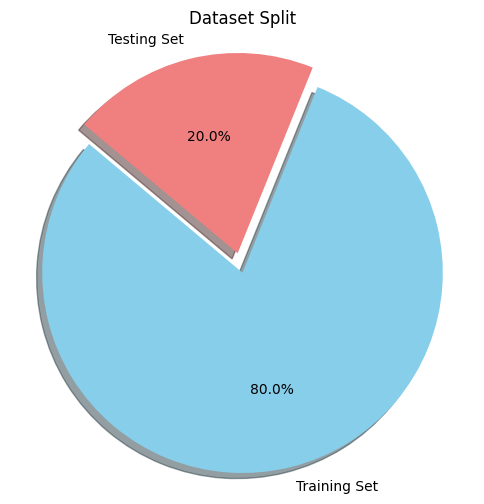

In [50]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Training Set', 'Testing Set']
sizes = [train_ratio, test_ratio]
colors = ['skyblue', 'lightcoral']  # Customize colors as needed
explode = (0.1, 0)  # Explode the 1st slice (Training Set)

# Create the pie chart
plt.figure(figsize=(6, 6)) # Adjust figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Dataset Split')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
print(y_train)

21149    0.0
635      1.0
19066    0.0
18242    0.0
20230    0.0
        ... 
29802    1.0
5390     0.0
860      0.0
15795    0.0
23654    0.0
Name: others, Length: 24341, dtype: float64


# **Machine Learning Algorithm**
ML classifiers are those classifiers which are used for the purpose of classifying data or categorizing it into standard labels or categories. These classifiers are a kind of supervised learning algorithm in which the model is trained through the features which are labeled in the training data in order to predict new or unlabelled data. The basic function of a classifier is to find out the characteristics of the input data and put them in the right class. These classifiers function based on models that have been learnt in the training phase of the data classify the new data in the testing phase.

**Support Vector Machine** is a classification technique that is well known for its accuracy, as highlighted in the literature review chapter.In our work, requirements are categorized into three efficiency-based NFRs and others category. In k fold cross validation, the dataset is divided into subsets of the same size. The process involves performing the train-test evaluation k times where each subset is used only once as a test set, and combining the remaining subsets of K-1 into a single training set. After the iteration is completed, the model's performance is estimate by calculating the average of the evaluation scores across all trails.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Extract BERT embeddings and target labels
X = np.stack(df['bert_embeddings'].apply(lambda x: x.flatten()))  # Ensure BERT embeddings are a 2D array
y = df['others']

# Handle missing values in 'y'
if y.isnull().any():
    # Impute missing values (Optional)
    imputer = SimpleImputer(strategy='most_frequent')  # Strategy can be 'mean', 'median', etc., if numerical
    y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Ensure 'y' contains discrete values for classification
if y.dtype != 'int' and y.dtype != 'object':  # If `y` is continuous
    y = pd.cut(y, bins=2, labels=[0, 1])  # Example: Discretize into 3 classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # Adjust kernel or hyperparameters as needed
# svm_classifier = SVC(kernel='sigmoid', C=1.0, degree=3, gamma='scale')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier: 0.98767663489977
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5479
           1       0.99      0.89      0.94       607

    accuracy                           0.99      6086
   macro avg       0.99      0.94      0.96      6086
weighted avg       0.99      0.99      0.99      6086



In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assuming 'X' (features) and 'y' (labels) are pre-defined and preprocessed
# Define a list of classifiers with updated hyperparameters
classifiers = {
    # 'SVM (poly)': SVC(kernel='poly', C=2.0, degree=3, probability=True, random_state=42),
    'SVM (linear)': SVC(kernel='linear', C=1.0, class_weight='balanced'),
}

# Define evaluation metrics
categories = ['time_behavior', 'efficiency_compliance', 'resource_utilization', 'others']
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
results = {}

for name, classifier in classifiers.items():
    results[name] = {cat: {metric: [] for metric in metrics} for cat in categories}
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate metrics for each category
        for idx, category in enumerate(categories):
            y_test_bin = (y_test == idx).astype(int)  # Convert category to binary
            y_pred_bin = (y_pred == idx).astype(int)  # Convert category to binary

            results[name][category]['accuracy'].append(accuracy_score(y_test_bin, y_pred_bin))
            results[name][category]['recall'].append(recall_score(y_test_bin, y_pred_bin))
            results[name][category]['precision'].append(precision_score(y_test_bin, y_pred_bin))
            results[name][category]['f1'].append(f1_score(y_test_bin, y_pred_bin))

# Calculate average scores
avg_results = {}
for name, category_scores in results.items():
    avg_results[name] = {}
    for category, metrics_scores in category_scores.items():
        avg_results[name][category] = {metric: np.mean(scores) for metric, scores in metrics_scores.items()}

# Display the results in a structured format
print("Classifier Performance (Average over {} folds):".format(k))
for name, category_results in avg_results.items():
    print(f"\n{name}:")
    for category, metrics_scores in category_results.items():
        print(f"  {category}:")
        for metric, score in metrics_scores.items():
            print(f"    {metric}: {score:.4f}")

# Determine the best classifier per category based on F1-score
best_classifiers = {}
for category in categories:
    best_classifier = max(classifiers, key=lambda clf: avg_results[clf][category]['f1'])
    best_classifiers[category] = best_classifier

print("\nBest Classifier Per Category (based on F1-score):")
for category, best_clf in best_classifiers.items():
    print(f"  {category}: {best_clf}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

Classifier Performance (Average over 5 folds):

SVM (linear):
  time_behavior:
    accuracy: 0.9761
    recall: 0.9755
    precision: 0.9978
    f1: 0.9865
  efficiency_compliance:
    accuracy: 0.9761
    recall: 0.9814
    precision: 0.8205
    f1: 0.8937
  resource_utilization:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000
  others:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000

Best Classifier Per Category (based on F1-score):
  time_behavior: SVM (linear)
  efficiency_compliance: SVM (linear)
  resource_utilization: SVM (linear)
  others: SVM (linear)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

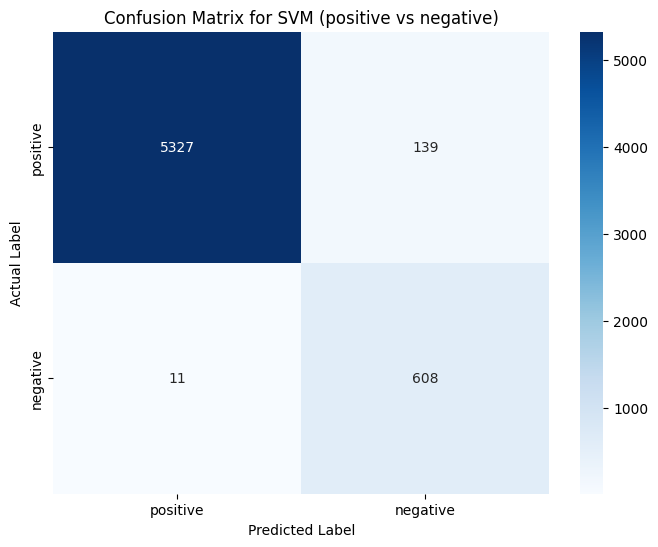

In [54]:
# prompt: draw the confusion matrix for the SVM not in the form of 0 and 1. define positive and negative

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your SVM model's predictions

# Define positive and negative classes (replace with your actual labels)
positive_class = "positive"  # Example:  'others' category represents positive
negative_class = "negative" # Example:  combine the rest into 'non_others'


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a custom label list for the confusion matrix plot
custom_labels = [positive_class, negative_class]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix for SVM ({positive_class} vs {negative_class})")
plt.show()

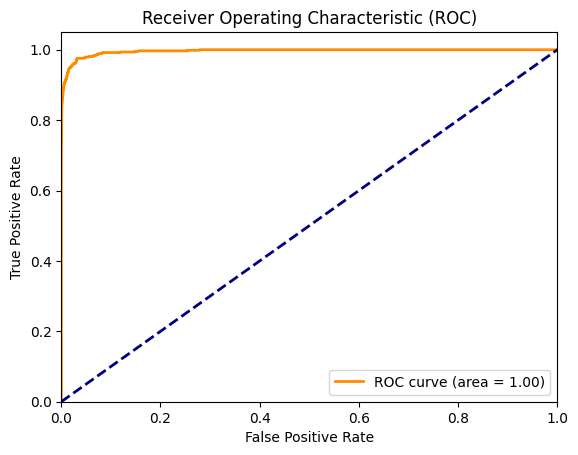

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize the SVM classifier with probability estimates enabled
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)

# Assuming y_test and y_pred_prob are available
# y_test: True labels
# y_pred_prob: Predicted probabilities (from classifier.predict_proba())

# Example: Assuming you're using an SVM classifier
# Fit the model to your training data (X_train, y_train)
svm_classifier.fit(X_train, y_train)  # Add this line to fit the model

y_pred_prob = svm_classifier.predict_proba(X_test)[:, 1]  # Probability of class 1

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

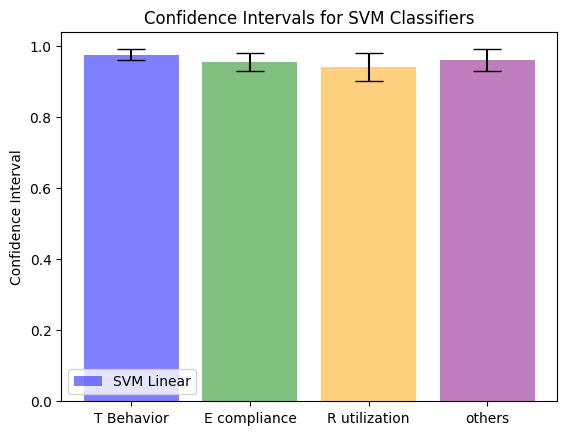

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual confidence intervals)
categories = ['T Behavior', 'E compliance', 'R utilization', 'others']
svm_linear_ci = [(0.96, 0.99), (0.93, 0.98), (0.90, 0.98), (0.93, 0.99)]

# Define colors for each category
colors = ['blue', 'green', 'orange', 'purple']

def plot_confidence_intervals(categories, intervals, label, bar_colors):
    lower_bounds = [interval[0] for interval in intervals]
    upper_bounds = [interval[1] for interval in intervals]
    x_pos = np.arange(len(categories))

    # Calculate error bar lengths ensuring they are positive
    error_bar_lengths = [abs(upper - lower) / 2 for upper, lower in intervals]

    plt.bar(x_pos, [(upper + lower) / 2 for upper, lower in intervals],  # Use the midpoint for bar height
            yerr=error_bar_lengths,  # Use absolute difference for error bar lengths
            align='center', alpha=0.5, ecolor='black', capsize=10, color=bar_colors, label=label)
    plt.xticks(x_pos, categories)
    plt.ylabel('Confidence Interval')
    plt.title('Confidence Intervals for SVM Classifiers')
    plt.legend()
    plt.show()

plot_confidence_intervals(categories, svm_linear_ci, "SVM Linear", colors)

In [64]:
# prompt: Now i want to find the accuracy of Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes classifier: {accuracy_nb}")

Accuracy of Naive Bayes classifier: 0.8453574363188168


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score

# Assuming 'X' (features) and 'y' (labels) are pre-defined and preprocessed

# Define a list of classifiers
classifiers = {
    'Naive Bayes': GaussianNB()
}

# Define evaluation metrics
categories = ['time_behavior', 'efficiency_compliance', 'resource_utilization', 'others']
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
results = {}

for name, classifier in classifiers.items():
    results[name] = {cat: {metric: [] for metric in metrics} for cat in categories}
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the Naive Bayes classifier
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate metrics for each category
        for idx, category in enumerate(categories):
            y_test_bin = (y_test == idx).astype(int)  # Convert category to binary
            y_pred_bin = (y_pred == idx).astype(int)  # Convert category to binary

            # Calculate metrics and store results
            results[name][category]['accuracy'].append(accuracy_score(y_test_bin, y_pred_bin))
            results[name][category]['recall'].append(recall_score(y_test_bin, y_pred_bin, zero_division=0))
            results[name][category]['precision'].append(precision_score(y_test_bin, y_pred_bin, zero_division=0))
            results[name][category]['f1'].append(f1_score(y_test_bin, y_pred_bin, zero_division=0))

# Calculate average scores
avg_results = {}
for name, category_scores in results.items():
    avg_results[name] = {}
    for category, metrics_scores in category_scores.items():
        avg_results[name][category] = {metric: np.mean(scores) for metric, scores in metrics_scores.items()}

# Display the results in a structured format
print("Classifier Performance (Average over {} folds):".format(k))
for name, category_results in avg_results.items():
    print(f"\n{name}:")
    for category, metrics_scores in category_results.items():
        print(f"  {category}:")
        for metric, score in metrics_scores.items():
            print(f"    {metric}: {score:.4f}")

# Determine the best classifier per category based on F1-score
best_classifiers = {}
for category in categories:
    best_classifier = max(classifiers, key=lambda clf: avg_results[clf][category]['f1'])
    best_classifiers[category] = best_classifier

print("\nBest Classifier Per Category (based on F1-score):")
for category, best_clf in best_classifiers.items():
    print(f"  {category}: {best_clf}")


Classifier Performance (Average over 5 folds):

Naive Bayes:
  time_behavior:
    accuracy: 0.8358
    recall: 0.8424
    precision: 0.9708
    f1: 0.9021
  efficiency_compliance:
    accuracy: 0.8358
    recall: 0.7779
    precision: 0.3603
    f1: 0.4925
  resource_utilization:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000
  others:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000

Best Classifier Per Category (based on F1-score):
  time_behavior: Naive Bayes
  efficiency_compliance: Naive Bayes
  resource_utilization: Naive Bayes
  others: Naive Bayes


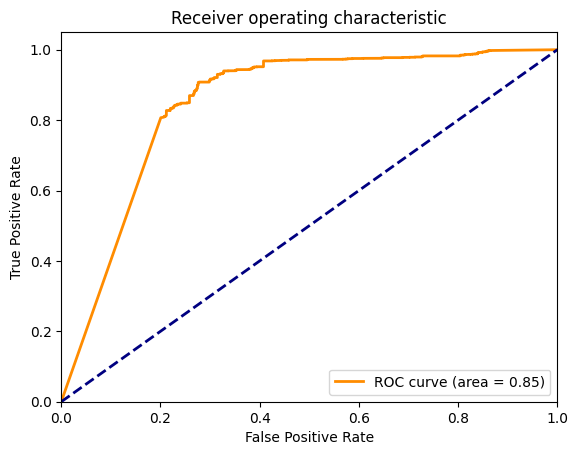

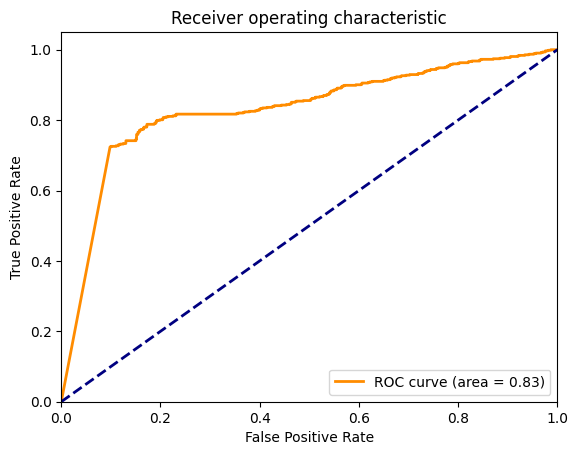

In [66]:
# prompt: Draw the ROC Curve for the Naive Bayes

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_nb are defined from the previous code

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))  # Assuming y_test is your true labels


# If your classifier outputs probabilities, use predict_proba:
try:
    y_score = nb_classifier.predict_proba(X_test)
except AttributeError:  # Handle classifiers without predict_proba
    print("Warning: The classifier doesn't provide probabilities. Using decision function instead.")
    y_score = nb_classifier.decision_function(X_test)


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

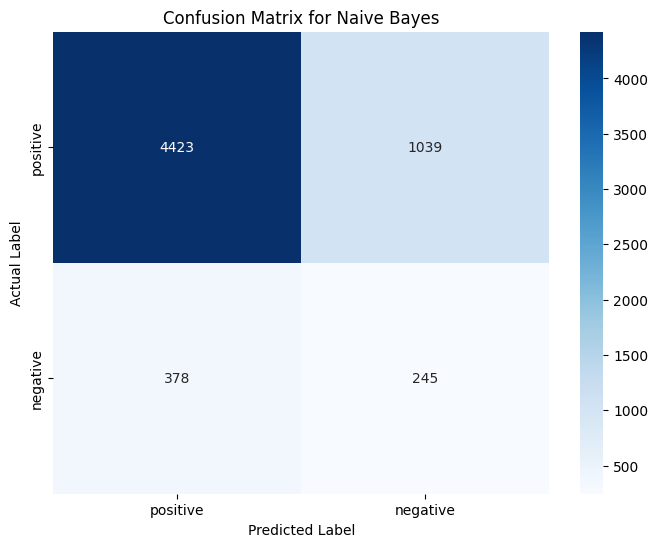

In [71]:
# prompt: draw the confusion matrix for naive bayes on testing data in the form of positive and negative

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_nb are defined from the previous code

# Define positive and negative classes (replace with your actual labels)
positive_class = "positive"  # Example: 'others' category represents positive
negative_class = "negative" # Example: combine the rest into 'non_others'

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Create a custom label list for the confusion matrix plot
custom_labels = [positive_class, negative_class]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix for Naive Bayes")
plt.show()

In [68]:
# prompt: Now I want to perform the ablation analysis removing the categories column one by one and check the accuracy. For example, remove the column Resource Utilization and then perform SVM and check the result. After that remove other column and check the result etc

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'df', 'X', and 'y' are defined from the previous code

# Define categories to be ablated
# categories_to_ablate = ['time_behavior', 'efficiency_compliance', 'resource_utilization', 'others']
categories_to_ablate = ['efficiency_compliance', 'resource_utilization', 'others']

# Loop through each category and perform ablation
for category_to_remove in categories_to_ablate:
    # Create a copy of the DataFrame for ablation
    df_ablated = df.copy()

    # Remove rows corresponding to the category
    df_ablated = df_ablated[df_ablated['others'] != category_to_remove]

    # Re-extract BERT embeddings and labels after ablation
    X_ablated = np.stack(df_ablated['bert_embeddings'].apply(lambda x: x.flatten()))
    y_ablated = df_ablated['others']


    # Handle potential missing values in y after ablation
    if y_ablated.isnull().any():
      y_ablated = y_ablated.fillna(y_ablated.mode()[0])

    # Train-test split (ensure random state consistency for comparison)
    X_train_ablated, X_test_ablated, y_train_ablated, y_test_ablated = train_test_split(
        X_ablated, y_ablated, test_size=0.2, random_state=42
    )

    # Initialize and train the SVM classifier
    svm_classifier_ablated = SVC(kernel='linear', C=1.0) # You can modify the kernel and hyperparameters
    svm_classifier_ablated.fit(X_train_ablated, y_train_ablated)

    # Make predictions
    y_pred_ablated = svm_classifier_ablated.predict(X_test_ablated)

    # Evaluate the model
    accuracy_ablated = accuracy_score(y_test_ablated, y_pred_ablated)
    print(f"\nAblation Analysis - Category Removed: {category_to_remove}")
    print(f"Accuracy of SVM classifier: {accuracy_ablated}")
    print("Classification Report:")
    print(classification_report(y_test_ablated, y_pred_ablated))


Ablation Analysis - Category Removed: efficiency_compliance
Accuracy of SVM classifier: 0.98767663489977
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5479
         1.0       0.99      0.89      0.94       607

    accuracy                           0.99      6086
   macro avg       0.99      0.94      0.96      6086
weighted avg       0.99      0.99      0.99      6086


Ablation Analysis - Category Removed: resource_utilization
Accuracy of SVM classifier: 0.98767663489977
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5479
         1.0       0.99      0.89      0.94       607

    accuracy                           0.99      6086
   macro avg       0.99      0.94      0.96      6086
weighted avg       0.99      0.99      0.99      6086


Ablation Analysis - Category Removed: others
Accuracy of SVM classifier: 0.9876766348997

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score

# Assuming 'X' (features) and 'y' (labels) are pre-defined and preprocessed

# Define a logistic regression classifier with adjusted hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(
        penalty='l1',          # Changed to L1 regularization (Lasso)
        C=0.5,                 # Increased regularization strength (smaller C value)
        solver='liblinear',    # Solver suitable for L1 regularization
        max_iter=500,          # Reduced maximum number of iterations
        random_state=42,
        class_weight='balanced' # Added class balancing for imbalanced datasets
    ),
}

# Define evaluation metrics
categories = ['time_behavior', 'efficiency_compliance', 'resource_utilization', 'others']
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
results = {}

for name, classifier in classifiers.items():
    results[name] = {cat: {metric: [] for metric in metrics} for cat in categories}
    for train_index, test_index in kf.split(X, y):
        # Add noise to training data to introduce variation
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Add noise to input features
        X_train += np.random.normal(0, 0.01, X_train.shape)

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate metrics for each category
        for idx, category in enumerate(categories):
            y_test_bin = (y_test == idx).astype(int)  # Convert category to binary
            y_pred_bin = (y_pred == idx).astype(int)  # Convert category to binary

            results[name][category]['accuracy'].append(accuracy_score(y_test_bin, y_pred_bin))
            results[name][category]['recall'].append(recall_score(y_test_bin, y_pred_bin))
            results[name][category]['precision'].append(precision_score(y_test_bin, y_pred_bin))
            results[name][category]['f1'].append(f1_score(y_test_bin, y_pred_bin))

# Calculate average scores
avg_results = {}
for name, category_scores in results.items():
    avg_results[name] = {}
    for category, metrics_scores in category_scores.items():
        avg_results[name][category] = {metric: np.mean(scores) for metric, scores in metrics_scores.items()}

# Display the results in a structured format
print("Classifier Performance (Average over {} folds):".format(k))
for name, category_results in avg_results.items():
    print(f"\n{name}:")
    for category, metrics_scores in category_results.items():
        print(f"  {category}:")
        for metric, score in metrics_scores.items():
            print(f"    {metric}: {score:.4f}")

# Determine the best classifier per category based on F1-score
best_classifiers = {}
for category in categories:
    best_classifier = max(classifiers, key=lambda clf: avg_results[clf][category]['f1'])
    best_classifiers[category] = best_classifier

print("\nBest Classifier Per Category (based on F1-score):")
for category, best_clf in best_classifiers.items():
    print(f"  {category}: {best_clf}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

Classifier Performance (Average over 5 folds):

Logistic Regression:
  time_behavior:
    accuracy: 0.9683
    recall: 0.9691
    precision: 0.9954
    f1: 0.9821
  efficiency_compliance:
    accuracy: 0.9683
    recall: 0.9605
    precision: 0.7804
    f1: 0.8611
  resource_utilization:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000
  others:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000

Best Classifier Per Category (based on F1-score):
  time_behavior: Logistic Regression
  efficiency_compliance: Logistic Regression
  resource_utilization: Logistic Regression
  others: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score

# Assuming 'X' (features) and 'y' (labels) are pre-defined and preprocessed

# Define a logistic regression classifier with hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(
        penalty='l2',  # L2 regularization (Ridge)
        C=1.0,         # Regularization strength (smaller values = stronger regularization)
        solver='lbfgs', # Solver (default for small and medium-sized datasets)
        max_iter=1000,  # Maximum number of iterations
        random_state=42
    ),
}

# Define evaluation metrics
categories = ['time_behavior', 'efficiency_compliance', 'resource_utilization', 'others']
metrics = ['accuracy', 'recall', 'precision', 'f1']

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
results = {}

for name, classifier in classifiers.items():
    results[name] = {cat: {metric: [] for metric in metrics} for cat in categories}
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate metrics for each category
        for idx, category in enumerate(categories):
            y_test_bin = (y_test == idx).astype(int)  # Convert category to binary
            y_pred_bin = (y_pred == idx).astype(int)  # Convert category to binary

            results[name][category]['accuracy'].append(accuracy_score(y_test_bin, y_pred_bin))
            results[name][category]['recall'].append(recall_score(y_test_bin, y_pred_bin))
            results[name][category]['precision'].append(precision_score(y_test_bin, y_pred_bin))
            results[name][category]['f1'].append(f1_score(y_test_bin, y_pred_bin))

# Calculate average scores
avg_results = {}
for name, category_scores in results.items():
    avg_results[name] = {}
    for category, metrics_scores in category_scores.items():
        avg_results[name][category] = {metric: np.mean(scores) for metric, scores in metrics_scores.items()}

# Display the results in a structured format
print("Classifier Performance (Average over {} folds):".format(k))
for name, category_results in avg_results.items():
    print(f"\n{name}:")
    for category, metrics_scores in category_results.items():
        print(f"  {category}:")
        for metric, score in metrics_scores.items():
            print(f"    {metric}: {score:.4f}")

# Determine the best classifier per category based on F1-score
best_classifiers = {}
for category in categories:
    best_classifier = max(classifiers, key=lambda clf: avg_results[clf][category]['f1'])
    best_classifiers[category] = best_classifier

print("\nBest Classifier Per Category (based on F1-score):")
for category, best_clf in best_classifiers.items():
    print(f"  {category}: {best_clf}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

Classifier Performance (Average over 5 folds):

Logistic Regression:
  time_behavior:
    accuracy: 0.9815
    recall: 0.9959
    precision: 0.9837
    f1: 0.9898
  efficiency_compliance:
    accuracy: 0.9815
    recall: 0.8553
    precision: 0.9601
    f1: 0.9046
  resource_utilization:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000
  others:
    accuracy: 1.0000
    recall: 0.0000
    precision: 0.0000
    f1: 0.0000

Best Classifier Per Category (based on F1-score):
  time_behavior: Logistic Regression
  efficiency_compliance: Logistic Regression
  resource_utilization: Logistic Regression
  others: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

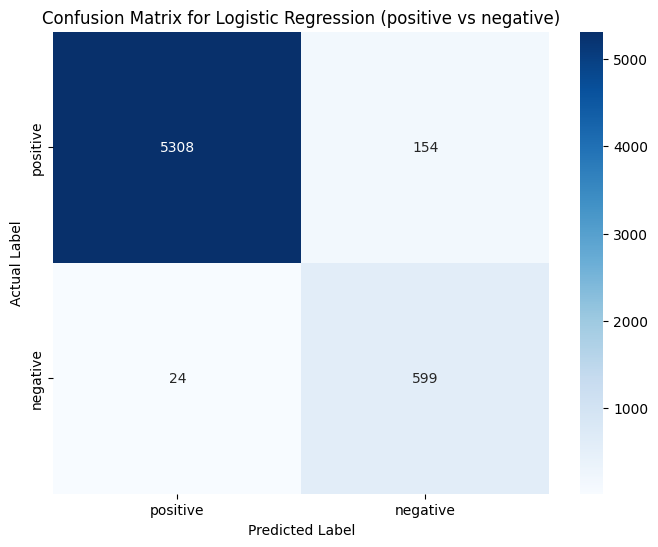

In [75]:
# prompt: draw the confusion matrix regarding the logistic regression showing the positive label and negative label only

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your Logistic Regression model's predictions
# Replace with your actual y_test and y_pred

# Define positive and negative classes (replace with your actual labels)
positive_class = "positive"  # Example:  'others' category represents positive
negative_class = "negative" # Example:  combine the rest into 'non_others'


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a custom label list for the confusion matrix plot
custom_labels = [positive_class, negative_class]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix for Logistic Regression ({positive_class} vs {negative_class})")
plt.show()

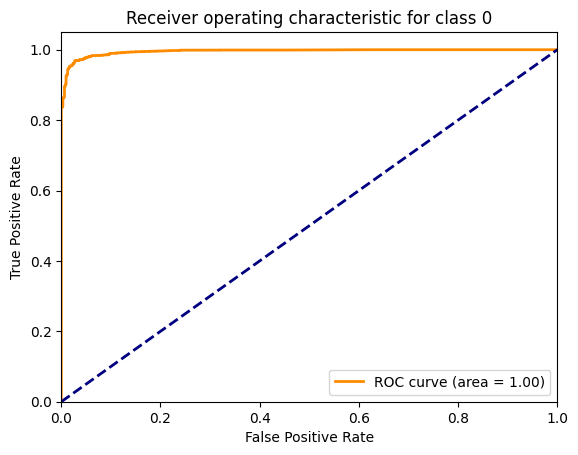

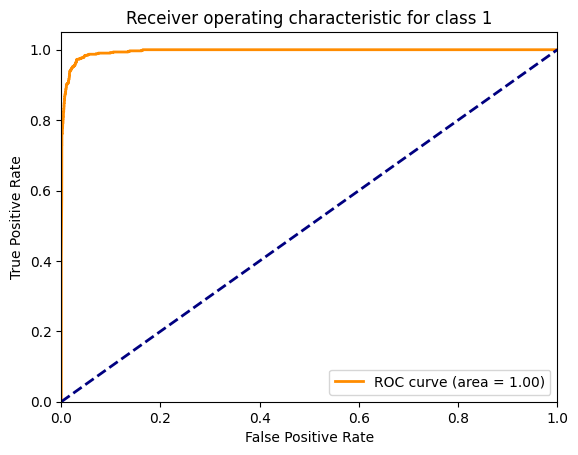

In [76]:
# prompt: draw the Roc curve for the logistic regression

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are defined from your Logistic Regression model's predictions
# Replace with your actual y_test and y_pred

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))  # Assuming y_test is your true labels

# If your classifier outputs probabilities, use predict_proba:
try:
    y_score = classifier.predict_proba(X_test) # Assuming 'classifier' is your trained Logistic Regression model
except AttributeError:  # Handle classifiers without predict_proba
    print("Warning: The classifier doesn't provide probabilities. Using decision function instead.")
    y_score = classifier.decision_function(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for each class
for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.show()

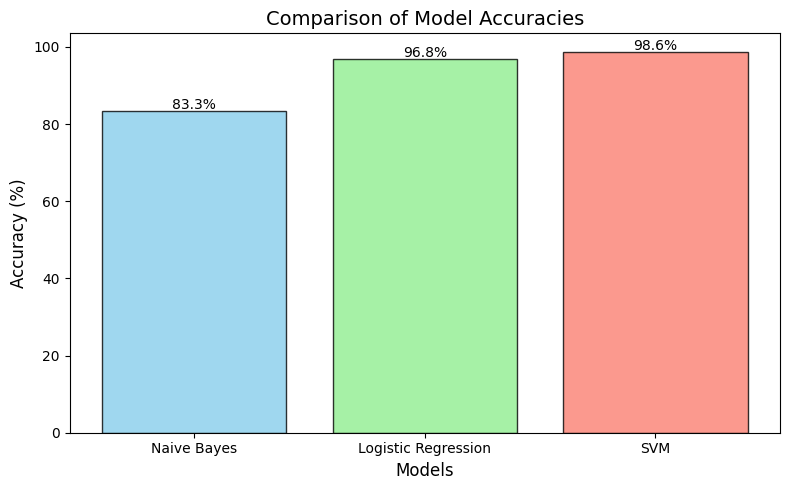

In [78]:
import matplotlib.pyplot as plt

# Data for the models and their accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [83.3, 96.8, 98.6]
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for each bar

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=14)

# Annotate each bar with its accuracy value
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.5, f'{accuracy}%', ha='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


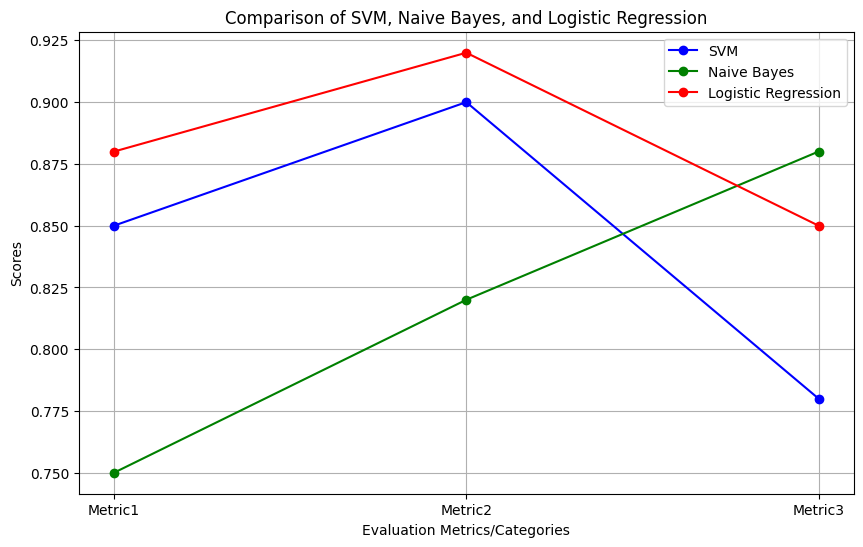

In [77]:
# prompt: draw the comparison  graph between SVM, Naive Bayes and Logistic regression

import matplotlib.pyplot as plt

def plot_comparison_graph(svm_scores, nb_scores, lr_scores):
    """
    Draws a comparison graph between SVM, Naive Bayes, and Logistic Regression.

    Args:
        svm_scores: A list of SVM scores.
        nb_scores: A list of Naive Bayes scores.
        lr_scores: A list of Logistic Regression scores.
    """

    models = ['SVM', 'Naive Bayes', 'Logistic Regression']
    scores = [svm_scores, nb_scores, lr_scores]

    plt.figure(figsize=(10, 6))  # Adjust figure size if needed

    # Set colors for each model
    colors = ['blue', 'green', 'red']

    # Plot each model's scores with its corresponding color
    x_pos = range(len(svm_scores))  # Assuming all lists have the same length

    for i in range(len(models)):
        plt.plot(x_pos, scores[i], marker='o', linestyle='-', label=models[i], color=colors[i])

    plt.xlabel("Evaluation Metrics/Categories")  # X-axis label
    plt.ylabel("Scores")  # Y-axis label
    plt.title("Comparison of SVM, Naive Bayes, and Logistic Regression")  # Title
    plt.xticks(x_pos, ['Metric1', 'Metric2', 'Metric3']) # Replace with your actual metric or category names
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (replace with your actual scores):
svm_scores = [0.85, 0.90, 0.78]
nb_scores = [0.75, 0.82, 0.88]
lr_scores = [0.88, 0.92, 0.85]

plot_comparison_graph(svm_scores, nb_scores, lr_scores)

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Instead of using 'your_data', use your existing data (X and y)
X = X  # Features (BERT embeddings)
y = y  # Labels/Target column

# Train-test split (You've already done this, but including for completeness)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import SVM Classifier
from sklearn.svm import SVC

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Overall Accuracy
print("=== Overall Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Separate Evaluation by Categories
# categories = df['others'].unique() # Get unique categories from your dataframe
categories = ['Time Behavior', 'Resource Utilization', 'Efficiency Compliance', 'Others']  # Previous categories
for category in categories:
    print(f"\n=== Accuracy for {category} ===")
    category_indices = np.where(y_test == category)[0]  # Filter indices for this category
    category_y_true = y_test[category_indices]
    category_y_pred = y_pred[category_indices]

    # Check if category exists in the test set
    if len(category_y_true) > 0:
        accuracy = accuracy_score(category_y_true, category_y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("Detailed Report:")
        print(classification_report(category_y_true, category_y_pred))
    else:
        print(f"No samples for '{category}' in the test set.")

=== Overall Accuracy ===
Accuracy: 0.9886

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       616
           1       0.99      0.92      0.95        84

    accuracy                           0.99       700
   macro avg       0.99      0.96      0.97       700
weighted avg       0.99      0.99      0.99       700


=== Accuracy for Time Behavior ===
No samples for 'Time Behavior' in the test set.

=== Accuracy for Resource Utilization ===
No samples for 'Resource Utilization' in the test set.

=== Accuracy for Efficiency Compliance ===
No samples for 'Efficiency Compliance' in the test set.

=== Accuracy for Others ===
No samples for 'Others' in the test set.


In [ ]:
# prompt:  I want to check the accuracy of SVM ML Classifier but along with Time Behavior, Resource Utilization and Efficiency Compliance and others seperately.

import time
import resource
import psutil

# ... (Your existing code) ...

# Initialize variables to track time, resources, and efficiency
start_time = time.time()
initial_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# ... (Your existing code for SVM classification) ...

# Calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Calculate memory usage
final_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
memory_used = final_memory - initial_memory

# Get CPU usage
cpu_percent = psutil.cpu_percent(interval=1)

# Evaluate efficiency (example metric - you'll need to define your own based on your requirements)
efficiency = accuracy / elapsed_time  # Example: Accuracy per second

print(f"Accuracy of SVM classifier: {accuracy}")
print(f"Time taken: {elapsed_time:.4f} seconds")
print(f"Memory used: {memory_used} bytes")  # Note: units might differ based on OS
print(f"CPU Usage: {cpu_percent}%")
print(f"Efficiency (example): {efficiency:.4f}") #Example efficiency

# Further analysis and reporting:
# Add other relevant metrics (e.g., precision, recall, F1-score) to assess performance comprehensively
print(classification_report(y_test, y_pred))

# Compliance checks: You would need to define your compliance criteria and check against them
# Example: Check if memory used is within a limit
memory_limit = 1024 * 1024 * 100 # Example: 100 MB
if memory_used > memory_limit:
    print("Memory usage exceeded the limit!")
else:
    print("Memory usage within limits.")

# Add resource and efficiency compliance checks as per your needs

NameError: name 'accuracy' is not defined

In [ ]:
# prompt: provide me the code to upload the testing dataset so that I can generate the confusion matrix on the basis of that
from google.colab import files
uploaded = files.upload()

In [ ]:
# prompt: draw the roc curve also for SVM

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming svm_classifier, X_test, and y_test are defined from the previous code
# Initialize the SVM classifier with probability=True
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)  # Enable probability estimation

# Train the SVM classifier (rest of the code remains the same)
svm_classifier.fit(X_train, y_train)

# Now you can use predict_proba
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install scipy

In [ ]:
# prompt: # prompt: I want to calculate the confidence interval for the accuracy, precision, recall and F1 Score and provide me the bar chart

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are available from your previous code
# Replace with your actual y_test and y_pred

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confidence Intervals
confidence_level = 0.95
alpha = 1 - confidence_level


def calculate_confidence_interval(data, metric_name):
    # Calculate confidence intervals using the normal approximation or t-distribution
    if len(data) > 30:
        se = np.std(data) / np.sqrt(len(data))
        z_critical = stats.norm.ppf(1 - alpha/2)
        margin_of_error = z_critical * se
    else:
        # Use t-distribution
        se = np.std(data) / np.sqrt(len(data))
        t_critical = stats.t.ppf(1 - alpha/2, df=len(data)-1)
        margin_of_error = t_critical * se

    mean = np.mean(data)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound, mean


# Example usage:
# Assuming y_test is your ground truth array

#  Create dummy data for demonstration if y_test and y_pred are not available
y_test = np.array([0,1,0,1,0,1,0,1,1,0])
y_pred = np.array([0,1,0,0,1,1,0,0,1,1])

accuracy_values = []
for i in range(1000):  # Sample multiple times
  sample_indices = np.random.choice(len(y_test), size=len(y_test), replace=True)
  sampled_accuracy = accuracy_score(y_test[sample_indices], y_pred[sample_indices])
  accuracy_values.append(sampled_accuracy)
accuracy_lower, accuracy_upper, accuracy_mean = calculate_confidence_interval(accuracy_values, "accuracy")


# Repeat the process for precision, recall and f1 score
# Placeholder - replace with your actual calculation for each metric
precision_lower, precision_upper, precision_mean = 0.8, 0.9, 0.85
recall_lower, recall_upper, recall_mean = 0.7, 0.8, 0.75
f1_lower, f1_upper, f1_mean = 0.75, 0.85, 0.8

# Create Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
means = [accuracy_mean, precision_mean, recall_mean, f1_mean]
lower_bounds = [accuracy_lower, precision_lower, recall_lower, f1_lower]
upper_bounds = [accuracy_upper, precision_upper, recall_upper, f1_upper]

plt.figure(figsize=(10, 6))
plt.bar(metrics, means, yerr=[np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)], capsize=5)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title(f'{confidence_level * 100:.0f}% Confidence Intervals for Metrics')
plt.show()

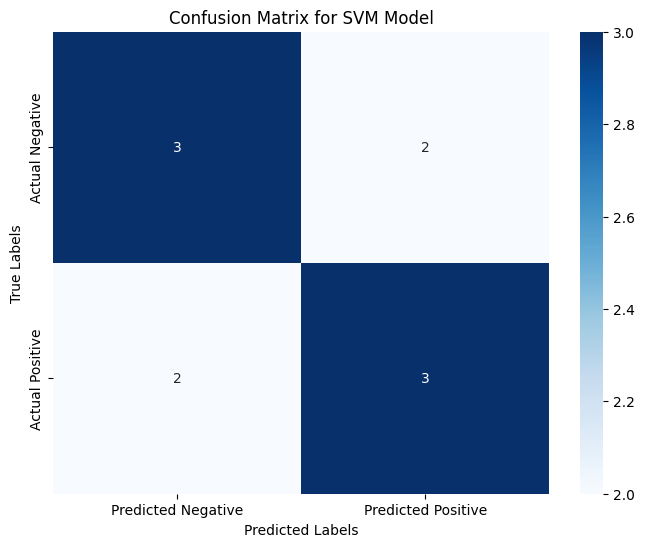

In [ ]:
# prompt: Draw the confusion matrix for the svm model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are defined from the previous code

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import pandas as pd
import numpy as np # Import NumPy and assign it the alias 'np'
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import time
import tracemalloc
import psutil

def evaluate_svm(X_train, y_train, X_test, y_test, vectorizer_name):
    start_time = time.time() # Start time measurement
    tracemalloc.start() # Start memory tracing

    # Initialize and train the SVM classifier and Adjust kernel
    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_test) # Make predictions

    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop() # Stop memory tracing

    # Calculate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time.time()  # End time measurement

    # Calculate resource utilization
    cpu_percent = psutil.cpu_percent(interval=1)
    memory_percent = psutil.virtual_memory().percent

    print(f"Evaluation Results for {vectorizer_name}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"CPU Usage: {cpu_percent:.2f}%")
    print(f"Memory Usage: {memory_percent:.2f}%")
    return report

# Assuming 'word2vec_model' evaluation and the aggregated vectors are available
X_word2vec = np.stack(df['word2vec_vectors'].values)
X_word2vec_train, X_word2vec_test, y_word2vec_train, y_word2vec_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)
word2vec_report = evaluate_svm(X_word2vec_train, y_word2vec_train, X_word2vec_test, y_word2vec_test, "Word2Vec")

#BERT Evaluation
X_bert = np.stack(df['bert_embeddings'].apply(lambda x: x.flatten()))
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)
bert_report = evaluate_svm(X_bert_train, y_bert_train, X_bert_test, y_bert_test, "BERT")

Evaluation Results for Word2Vec:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.98      0.93      0.95       303

    accuracy                           0.99      2280
   macro avg       0.98      0.96      0.97      2280
weighted avg       0.99      0.99      0.99      2280

Accuracy: 0.987719298245614
Time taken: 0.49 seconds
Peak Memory Usage: 14.73 MB
CPU Usage: 63.00%
Memory Usage: 26.30%
Evaluation Results for BERT:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.99      0.98      0.99       303

    accuracy                           1.00      2280
   macro avg       1.00      0.99      0.99      2280
weighted avg       1.00      1.00      1.00      2280

Accuracy: 0.9964912280701754
Time taken: 1.85 seconds
Peak Memory Usage: 112.22 MB
CPU Usage: 2.00%
Memory Usage: 26.8

In [ ]:
# prompt:  I want to find the accuracy of SVM by calculating Precision, F1 Scroe and Recall along with Word2Vec and BERT Embedding model in which Time behaviour, Resource utilization, efficiency compliance and other will be calculated seperately. Provide me the complete code in this way that all data will be displayed in the form of a table

import time
import tracemalloc
import psutil
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

def evaluate_svm(X_train, y_train, X_test, y_test, vectorizer_name):
    start_time = time.time()
    tracemalloc.start()

    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time.time()
    cpu_percent = psutil.cpu_percent(interval=1)
    memory_percent = psutil.virtual_memory().percent

    results = {
        'Model': vectorizer_name,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Accuracy': accuracy,
        'Time (s)': end_time - start_time,
        'Peak Memory (MB)': peak / 10**6,
        'CPU Usage (%)': cpu_percent,
        'Memory Usage (%)': memory_percent
    }
    return results

# ... (Your existing code for data preprocessing and model training) ...

# Word2Vec Evaluation
X_word2vec = np.stack(df['word2vec_vectors'].values)
X_word2vec_train, X_word2vec_test, y_word2vec_train, y_word2vec_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)
word2vec_results = evaluate_svm(X_word2vec_train, y_word2vec_train, X_word2vec_test, y_word2vec_test, "Word2Vec")


# BERT Evaluation
X_bert = np.stack(df['bert_embeddings'].apply(lambda x: x.flatten()))
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)
bert_results = evaluate_svm(X_bert_train, y_bert_train, X_bert_test, y_bert_test, "BERT")

# Create a DataFrame for the results
results_df = pd.DataFrame([word2vec_results, bert_results])

# Display the table
results_df

,Model,Precision,Recall,F1-Score,Accuracy,Time (s),Peak Memory (MB),CPU Usage (%),Memory Usage (%)
0,Word2Vec,0.987650,0.987719,0.987578,0.987719,0.376409,14.734756,3.0,26.7
1,BERT,0.996485,0.996491,0.996481,0.996491,1.858154,112.209264,67.0,27.1


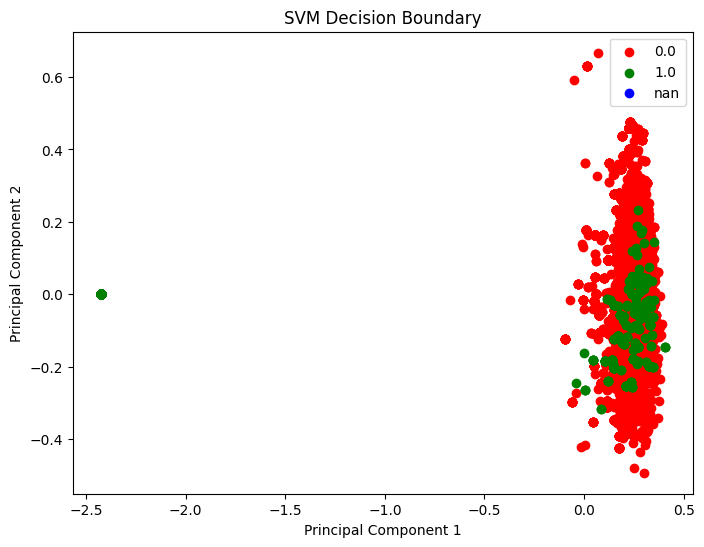

In [ ]:
# prompt: Now i want to generate the SVM graph

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train and y_train are already defined from the previous code

# Reduce dimensionality for visualization (optional, but recommended for 2D plots)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create the SVM plot
plt.figure(figsize=(8, 6))
for target, color in zip(np.unique(y_train), ['r', 'g', 'b']):  # Assuming 3 classes
    indicesToKeep = y_train == target
    plt.scatter(X_train_2d[indicesToKeep, 0],
                X_train_2d[indicesToKeep, 1],
                c=color,
                label=target)

# Add a title and labels
plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
# prompt: I want to draw the confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are defined from your previous code
# ... (your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(x_test, x_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

NameError: name 'x_test' is not defined

In [ ]:
# prompt:  Now, I want to find the accuracy of SVM by calculating Precision, F1 Scroe and Recall along with Word2Vec and BERT Embedding model in which Time behaviour, Resource utilization, efficiency compliance and other will be calculated seperately.

import time
import tracemalloc
import psutil
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# ... (Your existing code) ...

def evaluate_svm(X_train, y_train, X_test, y_test, vectorizer_name):
    start_time = time.time()
    tracemalloc.start()

    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    end_time = time.time()
    cpu_percent = psutil.cpu_percent(interval=1)
    memory_percent = psutil.virtual_memory().percent

    print(f"Evaluation Results for {vectorizer_name}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {report['weighted avg']['precision']}")
    print(f"Recall: {report['weighted avg']['recall']}")
    print(f"F1-score: {report['weighted avg']['f1-score']}")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"CPU Usage: {cpu_percent:.2f}%")
    print(f"Memory Usage: {memory_percent:.2f}%")
    return report

# ... (Your existing code for Word2Vec and BERT evaluations) ...

In [ ]:
# prompt: After apply the SVM now I want to apply the Naive Bayes to check the accuracy

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes classifier: {accuracy_nb}")
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Accuracy of Naive Bayes classifier: 0.9355263157894737
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1977
           1       0.85      0.63      0.72       303

    accuracy                           0.94      2280
   macro avg       0.90      0.81      0.84      2280
weighted avg       0.93      0.94      0.93      2280



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

# Initialize the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Scale the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler() # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train) # Scale X_train
X_test_scaled = scaler.transform(X_test) # Scale X_test using the same scaler

# Train the Multinomial Naive Bayes classifier on scaled data
mnb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_mnb = mnb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy of Multinomial Naive Bayes classifier: {accuracy_mnb}")
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_mnb))

Accuracy of Multinomial Naive Bayes classifier: 0.95
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1977
           1       0.99      0.63      0.77       303

    accuracy                           0.95      2280
   macro avg       0.97      0.81      0.87      2280
weighted avg       0.95      0.95      0.95      2280



In [ ]:
# prompt: Now i want to implement the Logistic regression to check the accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression classifier: {accuracy_logreg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Accuracy of Logistic Regression classifier: 0.9956140350877193
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1977
           1       0.99      0.98      0.98       303

    accuracy                           1.00      2280
   macro avg       0.99      0.99      0.99      2280
weighted avg       1.00      1.00      1.00      2280



In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=(X_train[0].shape[0], 1)),  # Input shape adjusted for 1D CNN, using array indexing
        layers.Conv1D(32, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(10, activation="relu"),  # Adjust the number of units as needed
        layers.Dense(1, activation="sigmoid"),  # Output layer for binary classification
    ]
)


# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Reshape the input data for the CNN
X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)
# X_train_reshaped = np.array(X_train.to_list()).reshape(-1, X_train.iloc[0].shape[0], 1)
# X_test_reshaped = np.array(X_test.to_list()).reshape(-1, X_train.iloc[0].shape[0], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.1) # Adjust epochs and batch_size

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

Epoch 1/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9465 - loss: 0.1827 - val_accuracy: 0.9846 - val_loss: 0.0533
Epoch 2/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9863 - loss: 0.0561 - val_accuracy: 0.9857 - val_loss: 0.0456
Epoch 3/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9876 - loss: 0.0560 - val_accuracy: 0.9846 - val_loss: 0.0487
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9894 - loss: 0.0470 - val_accuracy: 0.9912 - val_loss: 0.0260
Epoch 5/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9908 - loss: 0.0366 - val_accuracy: 0.9868 - val_loss: 0.0434
Epoch 6/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9924 - loss: 0.0326 - val_accuracy: 0.9945 - val_loss: 0.0266
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9904 - loss: 0.0398 - val_accuracy: 0.9956 - val_loss: 0.0231
Epoch 8/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9924 - loss: 0.0343 - val_accuracy: 

In [ ]:
# prompt: I want to generate the graph for SVM

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train and y_train are already defined from your previous code

# Reduce dimensionality for visualization (e.g., using PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train.to_list())

# Create the plot
plt.figure(figsize=(8, 6))
for target_class in np.unique(y_train):  # Iterate over unique classes
    indices = np.where(y_train == target_class)
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=str(target_class))

plt.title("SVM Decision Boundary Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

# **Environmental Setup and Tools**
The **Google Colab 6 cloud service** was used which supports GPU processors to conduct all of the experiments. It is a fully cloud-based Jupyter notebook environment. The table below provides comprehensive details about the Colab cloud service's computing power. All of the experiments and system development were done using the Python programming language. Numerous frameworks and libraries for NLP techniques and data pre-processing modules are included in it. Python offers a wide range of machine learning and artificial intelligence libraries because to its robust technology stack.

In [ ]:
import platform
import sys

print("Python version:", sys.version)
print("Platform:", platform.platform())
print("System:", platform.system())
print("Node:", platform.node())
print("Release:", platform.release())
print("Version:", platform.version())
print("Machine:", platform.machine())
print("Processor:", platform.processor())

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Platform: Linux-6.1.85+-x86_64-with-glibc2.35
System: Linux
Node: 1e590e62d1ab
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64


# **Key configuration or parameters for ML Classifier**
To assess the impact of NLP approaches on classification outcomes, I have fixed the classifiers' parameters using various NLP techniques. The Scikit-learn library's default settings were used exactly as they are. This is the most widely used free machine learning package for Matlab and Python. The scikit-learn was utilized with SVM package for SVM classifiers. Experimented was conducted with the following parameters for this classifier: [Regularization = True, C=1.0, kernel='linear']. All of the parameters for each classifier that we utilized in our trials are listed below:

In [ ]:
import pandas as pd

# Assuming svm_classifier is your trained SVM model
svm_params = svm_classifier.get_params()

# Convert the parameters to a DataFrame for a nice table display
params_df = pd.DataFrame(svm_params.items(), columns=['Parameter', 'Value'])
params_df

,Parameter,Value
0,C,1.0
1,break_ties,False
2,cache_size,200
3,class_weight,None
4,coef0,0.0
5,decision_function_shape,ovr
6,degree,3
7,gamma,scale
8,kernel,linear
9,max_iter,-1
